## 이미지 데이터 전처리

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**상황에 맞게 데이터셋 디렉토리 지정**

In [2]:
import os

input_dir_heart_train = "/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_img/train"
target_dir_heart_train = "/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_label/train"
input_dir_heart_val = "/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_img/val"
target_dir_heart_val = "/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_label/val"
input_dir_heart_test = "/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_img/test"
target_dir_heart_test = "/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_label/test"

In [3]:
# input_dir_heart와 target_dir_heart에서 .png 파일만 필터링하고 정렬
input_img_files_train = sorted([f for f in os.listdir(input_dir_heart_train) if f.endswith('.png')])
target_img_files_train = sorted([f for f in os.listdir(target_dir_heart_train) if f.endswith('.png')])
input_img_files_val = sorted([f for f in os.listdir(input_dir_heart_val) if f.endswith('.png')])
target_img_files_val = sorted([f for f in os.listdir(target_dir_heart_val) if f.endswith('.png')])
input_img_files_test = sorted([f for f in os.listdir(input_dir_heart_test) if f.endswith('.png')])
target_img_files_test = sorted([f for f in os.listdir(target_dir_heart_test) if f.endswith('.png')])

# 결과 확인
print("Input Directory_train의 이미지 파일:", input_img_files_train)
print("Target Directory_train의 이미지 파일:", target_img_files_train)
print("Input Directory_val의 이미지 파일:", input_img_files_val)
print("Target Directory_val의 이미지 파일:", target_img_files_val)
print("Input Directory_test의 이미지 파일:", input_img_files_test)
print("Target Directory_test의 이미지 파일:", target_img_files_test)

Input Directory_train의 이미지 파일: ['14241_AV.png', '14241_MV.png', '14241_PV.png', '14241_TV.png', '24160_AV.png', '24160_MV.png', '24160_PV.png', '24160_TV.png', '2530_AV.png', '2530_MV.png', '2530_PV.png', '2530_TV.png', '29045_AV.png', '29045_MV.png', '29045_PV.png', '29045_TV.png', '29378_AV.png', '29378_MV.png', '33151_AV.png', '33151_MV.png', '33151_PV.png', '33151_TV.png', '36327_AV.png', '36327_MV.png', '36327_PV.png', '36327_TV.png', '38337_AV.png', '38337_MV.png', '39043_AV.png', '39043_MV.png', '39043_PV.png', '39043_TV.png', '39403_AV.png', '39403_MV.png', '39403_PV.png', '39403_TV.png', '39456_MV.png', '39456_PV.png', '39456_TV.png', '40798_AV.png', '40798_MV.png', '40798_PV.png', '40798_TV.png', '40840_AV.png', '40840_MV.png', '40840_PV.png', '40840_TV.png', '44514_AV.png', '44514_MV.png', '44514_PV.png', '44514_TV.png', '45843_AV.png', '45843_MV.png', '45843_PV.png', '45843_TV.png', '46065_AV.png', '46065_MV.png', '46065_PV.png', '46065_TV.png', '46532_AV.png', '46579_AV.pn

In [4]:
print(f"train용 입력데이터 개수: {len(input_img_files_train)}")
print(f"train용 타겟데이터 개수: {len(target_img_files_train)}")
print(f"val용 입력데이터 개수: {len(input_img_files_val)}")
print(f"val용 타겟데이터 개수: {len(target_img_files_val)}")
print(f"test용 입력데이터 개수: {len(input_img_files_test)}")
print(f"test용 타겟데이터 개수: {len(target_img_files_test)}")

train용 입력데이터 개수: 2535
train용 타겟데이터 개수: 2535
val용 입력데이터 개수: 314
val용 타겟데이터 개수: 314
test용 입력데이터 개수: 313
test용 타겟데이터 개수: 313


In [5]:
from PIL import Image

def check_image_sizes(folder_path):
    # 폴더 내의 모든 파일 가져오기
    files = os.listdir(folder_path)

    # 이미지 파일 목록을 저장할 리스트
    image_files = [file for file in files if file.lower().endswith(('.png'))]

    # 첫 번째 이미지의 크기를 기준으로 설정
    first_image = Image.open(os.path.join(folder_path, image_files[0]))
    reference_size = first_image.size

    # 나머지 이미지들의 크기 확인
    for file in image_files[1:]:
        img = Image.open(os.path.join(folder_path, file))
        if img.size != reference_size:
            print("모든 이미지가 동일한 크기가 아닙니다.")
            return

    print("모든 이미지가 동일한 크기입니다:", reference_size)

# 사용 예시
check_image_sizes(input_dir_heart_train)
check_image_sizes(target_dir_heart_train)
check_image_sizes(input_dir_heart_val)
check_image_sizes(target_dir_heart_val)
check_image_sizes(input_dir_heart_test)
check_image_sizes(target_dir_heart_test)

모든 이미지가 동일한 크기입니다: (256, 256)
모든 이미지가 동일한 크기입니다: (256, 256)
모든 이미지가 동일한 크기입니다: (256, 256)
모든 이미지가 동일한 크기입니다: (256, 256)
모든 이미지가 동일한 크기입니다: (256, 256)
모든 이미지가 동일한 크기입니다: (256, 256)


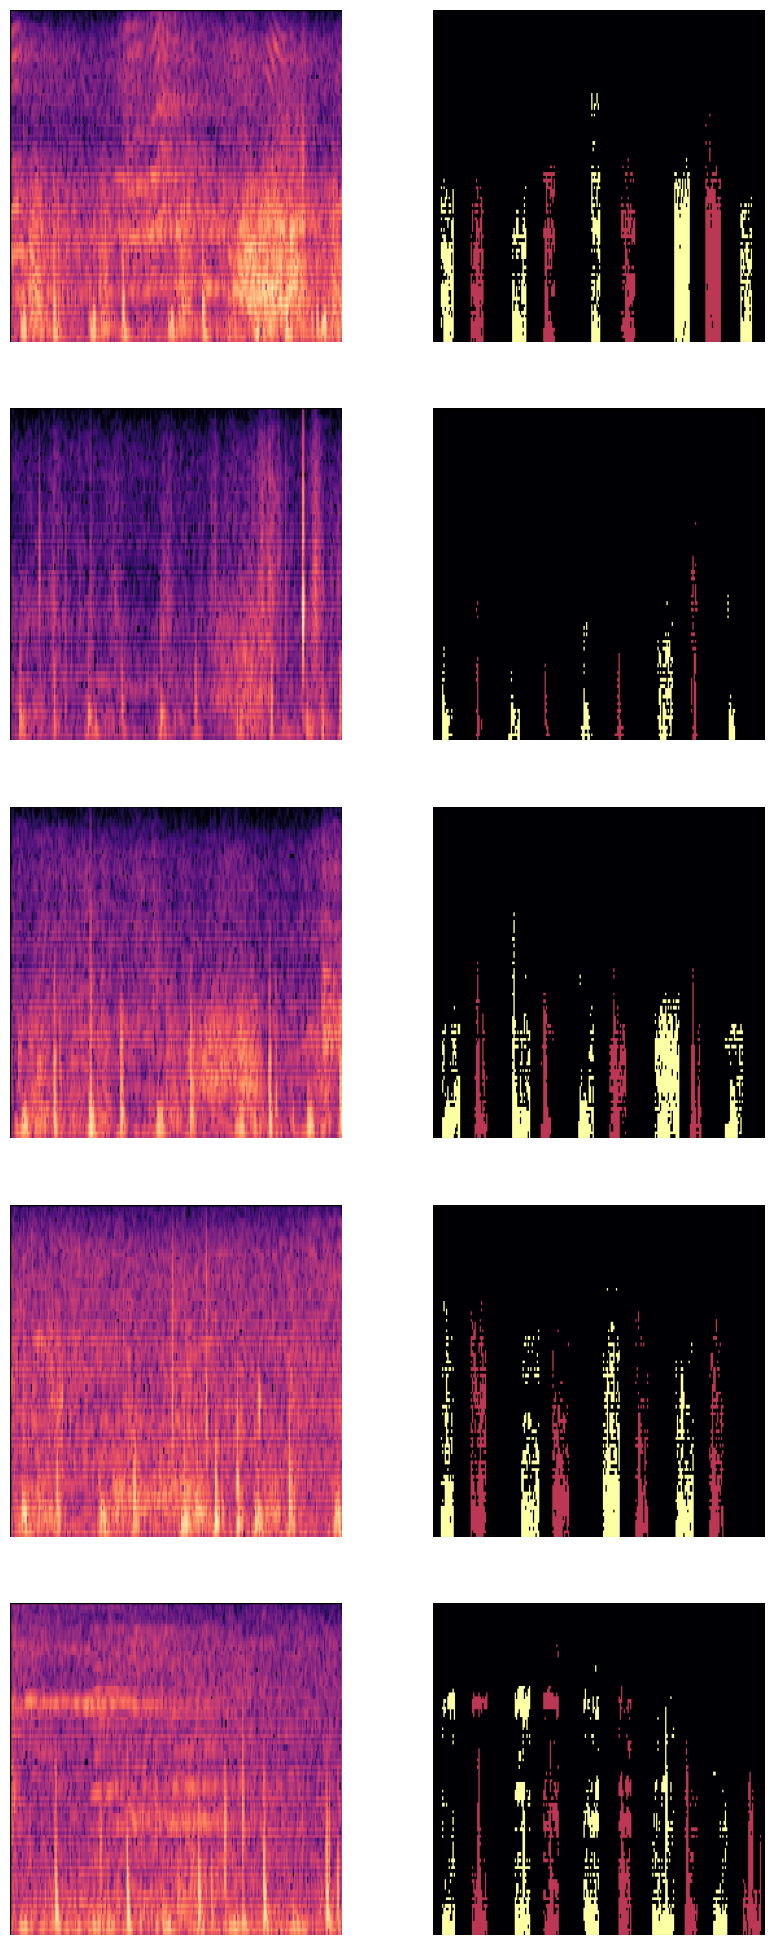

In [6]:
# 데이터 시각화 확인
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.figure(figsize=(10,25))
for j in range(5):
    plt.subplot(5, 2, 2 * j + 1)
    plt.axis("off")
    plt.imshow(load_img(input_dir_heart_train + '/' + input_img_files_train[j]))
    plt.subplot(5, 2, 2 * j + 2)
    plt.axis("off")
    plt.imshow(load_img(target_dir_heart_train + '/' + target_img_files_train[j]))

In [7]:
# 타겟 데이터의 내부 컬러맵 값 확인
import numpy as np

target = load_img(target_dir_heart_train + '/' + target_img_files_train[0],color_mode='grayscale')
target = img_to_array(target)
target = target.astype("uint8")
color = np.unique(target)
color

array([  0,  95,  98, 237, 244], dtype=uint8)

In [8]:
# 타겟 데이터의 내부 컬러맵 값 확인
import numpy as np

target = load_img(target_dir_heart_val + '/' + target_img_files_val[0],color_mode='grayscale')
# print(target.size)
target = img_to_array(target)
target = target.astype("uint8")
color = np.unique(target)
color

array([  0,  95,  98, 237, 244], dtype=uint8)

**컬러맵의 값이 어떻게 분포되어 있는지 확인해보자**

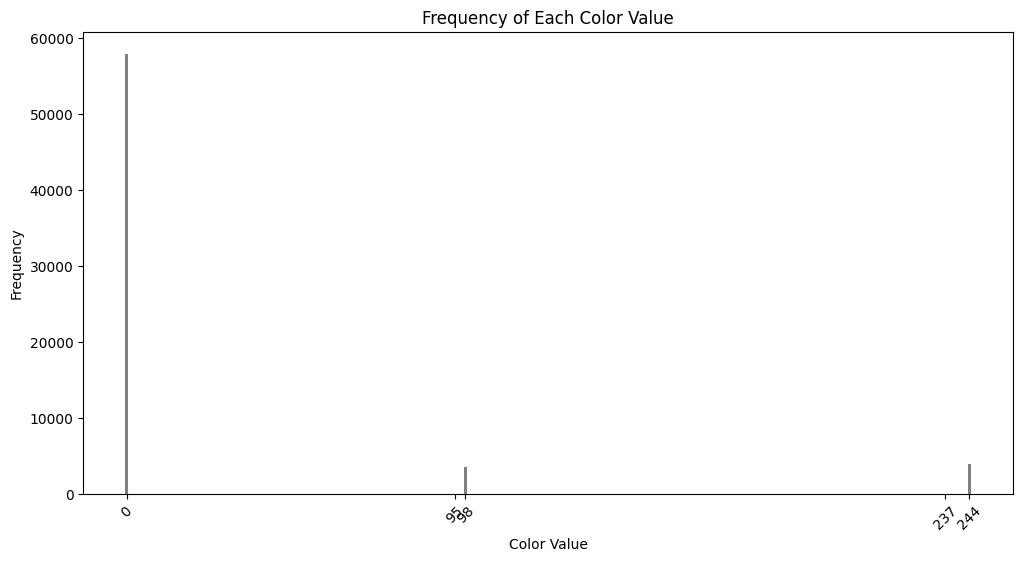

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

# 첫 번째 이미지를 불러옵니다
target = load_img(target_dir_heart_train + '/' + target_img_files_train[0], color_mode='grayscale')
target = img_to_array(target)
target = target.astype("uint8")

# # 이미지를 시각화합니다
# plt.imshow(target)
# plt.axis('off')
# plt.show()

# 고유한 색상 값 추출
unique_colors = np.unique(target)
# 각 색상 값의 빈도수 계산
color_counts = np.bincount(target.flatten())
# 빈도수가 0이 아닌 색상 값과 해당 빈도수 추출
colors_with_counts = [(color, count) for color, count in enumerate(color_counts) if count > 0]
# 색상 값과 빈도수를 분리
colors, counts = zip(*colors_with_counts)

# 빈도수 시각화
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.bar(colors, counts, color='gray')
plt.title("Frequency of Each Color Value")
plt.xlabel("Color Value")
plt.ylabel("Frequency")
plt.xticks(unique_colors, unique_colors, rotation=45)  # 고유 색상 값의 눈금만 표시
plt.show()

**0: background, 98: S1, 244: S2**
> Input 데이터의 0, 98, 244만 색상값을 유지하고 나머지는 색상값을 0으로 변경

In [10]:
import os
from keras.preprocessing.image import load_img, img_to_array, save_img

# 유지할 색상 값 설정
keep_colors = [0, 98, 244]

# 필터링된 이미지를 저장할 디렉토리 확인 및 생성
save_dir_train = '/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/filtered_images/train'
if not os.path.exists(save_dir_train):
    os.makedirs(save_dir_train)

# 이미지 파일들을 순회하며 처리
for file in target_img_files_train:
    # 이미지 불러오기
    img_path = os.path.join(target_dir_heart_train, file)
    img = load_img(img_path, color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = img_array.astype("uint8")

    # 유지할 색상이 아닌 값들을 0으로 설정
    mask = np.isin(img_array, keep_colors)
    filtered_img = np.where(mask, img_array, 0)

    # 채널 차원을 유지하도록 조정
    if filtered_img.ndim == 2:
        filtered_img = np.expand_dims(filtered_img, axis=-1)

    # 필터링된 이미지 저장
    save_path_train = os.path.join(save_dir_train, file)
    save_img(save_path_train, filtered_img)

In [11]:
import os
from keras.preprocessing.image import load_img, img_to_array, save_img

# 유지할 색상 값 설정
keep_colors = [0, 98, 244]

# 필터링된 이미지를 저장할 디렉토리 확인 및 생성
save_dir_val = '/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/filtered_images/val'
if not os.path.exists(save_dir_val):
    os.makedirs(save_dir_val)

# 이미지 파일들을 순회하며 처리
for file in target_img_files_val:
    # 이미지 불러오기
    img_path = os.path.join(target_dir_heart_val, file)
    img = load_img(img_path, color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = img_array.astype("uint8")

    # 유지할 색상이 아닌 값들을 0으로 설정
    mask = np.isin(img_array, keep_colors)
    filtered_img = np.where(mask, img_array, 0)

    # 채널 차원을 유지하도록 조정
    if filtered_img.ndim == 2:
        filtered_img = np.expand_dims(filtered_img, axis=-1)

    # 필터링된 이미지 저장
    save_path_val = os.path.join(save_dir_val, file)
    save_img(save_path_val, filtered_img)

In [12]:
import os
from keras.preprocessing.image import load_img, img_to_array, save_img

# 유지할 색상 값 설정
keep_colors = [0, 98, 244]

# 필터링된 이미지를 저장할 디렉토리 확인 및 생성
save_dir_test = '/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/filtered_images/test'
if not os.path.exists(save_dir_test):
    os.makedirs(save_dir_test)

# 이미지 파일들을 순회하며 처리
for file in target_img_files_test:
    # 이미지 불러오기
    img_path = os.path.join(target_dir_heart_test, file)
    img = load_img(img_path, color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = img_array.astype("uint8")

    # 유지할 색상이 아닌 값들을 0으로 설정
    mask = np.isin(img_array, keep_colors)
    filtered_img = np.where(mask, img_array, 0)

    # 채널 차원을 유지하도록 조정
    if filtered_img.ndim == 2:
        filtered_img = np.expand_dims(filtered_img, axis=-1)

    # 필터링된 이미지 저장
    save_path_test = os.path.join(save_dir_test, file)
    save_img(save_path_test, filtered_img)

**타겟 데이터 내부 색상값 재확인**

In [13]:
# 타겟 데이터의 내부 값 확인
import numpy as np

target = load_img(save_dir_train + '/' + target_img_files_train[1],color_mode='grayscale')
target = img_to_array(target)
target = target.astype("uint8")
color = np.unique(target)
color

array([  0, 102, 255], dtype=uint8)

**색상값 라벨링**
>0:백그라운드, 102:S1심음, 255:S2심음

In [14]:
!pip install -q git+https://github.com/keras-team/keras-cv.git --upgrade

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 13.0 MB/s eta 0:00:00


In [15]:
import os
import requests
from zipfile import ZipFile
import glob
from dataclasses import dataclass

import random
import numpy as np
import cv2

import tensorflow as tf
import keras_cv

import matplotlib.pyplot as plt

Using TensorFlow backend


In [16]:
@dataclass(frozen=True)
class DatasetConfig:
    IMAGE_SIZE:        tuple = (256, 256)
    BATCH_SIZE:          int = 16
    NUM_CLASSES:         int = 3
    BRIGHTNESS_FACTOR: float = 0.2
    CONTRAST_FACTOR:   float = 0.2

In [17]:
@dataclass(frozen=True)
class TrainingConfig:
    MODEL:           str = "resnet50_v2_imagenet"
    EPOCHS:          int = 50
    LEARNING_RATE: float = 1e-4
    CKPT_DIR:        str = os.path.join("checkpoints_"+"_".join(MODEL.split("_")[:2]),
                                        "deeplabv3_plus_"+"_".join(MODEL.split("_")[:2])+".h5")
    LOGS_DIR:        str = "logs_"+"_".join(MODEL.split("_")[:2])

In [18]:
data_config = DatasetConfig()
train_config = TrainingConfig()

In [19]:
def read_image_mask(image_path, mask=False, size=data_config.IMAGE_SIZE):
    image = tf.io.read_file(image_path)

    if mask:
        image = tf.io.read_file(image_path)
        image = tf.io.decode_image(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=size, method="bicubic")

        # 원본 마스크 이미지에서 라벨 별로 픽셀을 분리
        label_0_mask = tf.cast(tf.equal(image, 0), tf.uint8)
        label_1_mask = tf.cast(tf.equal(image, 102), tf.uint8)
        label_2_mask = tf.cast(tf.equal(image, 255), tf.uint8)

        # 여러 라벨을 하나의 마스크로 결합
        combined_mask = label_0_mask * 0 + label_1_mask * 1 + label_2_mask * 2
        return combined_mask

    else:
        image = tf.io.decode_image(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=size, method="bicubic")
        image = tf.cast(tf.clip_by_value(image, 0., 255.), tf.float32)

    return image

In [20]:
def load_data(image_list, mask_list):
    image = read_image_mask(image_list)
    mask  = read_image_mask(mask_list, mask=True)
    return {"images":image, "segmentation_masks":mask}

In [21]:
input_img_files_train = sorted([os.path.join(input_dir_heart_train, f) for f in os.listdir(input_dir_heart_train) if f.endswith('.png')])
input_img_files_val = sorted([os.path.join(input_dir_heart_val, f) for f in os.listdir(input_dir_heart_val) if f.endswith('.png')])
input_img_files_test = sorted([os.path.join(input_dir_heart_test, f) for f in os.listdir(input_dir_heart_test) if f.endswith('.png')])
target_img_files_train = sorted([os.path.join(save_dir_train, f) for f in os.listdir(save_dir_train) if f.endswith('.png')])
target_img_files_val = sorted([os.path.join(save_dir_val, f) for f in os.listdir(save_dir_val) if f.endswith('.png')])
target_img_files_test = sorted([os.path.join(save_dir_test, f) for f in os.listdir(save_dir_test) if f.endswith('.png')])

print("Input Directory_train의 이미지 파일:", input_img_files_train)
print("Input Directory_val의 이미지 파일:", input_img_files_val)
print("Input Directory_test의 이미지 파일:", input_img_files_test)
print("Target Directory_train의 이미지 파일:", target_img_files_train)
print("Target Directory_val의 이미지 파일:", target_img_files_val)
print("Target Directory_test의 이미지 파일:", target_img_files_test)

Input Directory_train의 이미지 파일: ['/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_img/train/14241_AV.png', '/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_img/train/14241_MV.png', '/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_img/train/14241_PV.png', '/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_img/train/14241_TV.png', '/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_img/train/24160_AV.png', '/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_img/train/24160_MV.png', '/content/drive/MyDrive/aiffelthon_heartsignal/HeartSignal/notebooks/preprocessed_data/dB_segment/256px_2halfsec_img/train/24160_PV.png', '/

In [22]:
# 데이터셋 생성
train_data = tf.data.Dataset.from_tensor_slices((input_img_files_train, target_img_files_train))
val_data = tf.data.Dataset.from_tensor_slices((input_img_files_val, target_img_files_val))
test_data = tf.data.Dataset.from_tensor_slices((input_img_files_test, target_img_files_test))

train_ds = train_data.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
valid_ds = val_data.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_data.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)

In [23]:
def unpackage_inputs(inputs):
    images = inputs["images"]
    segmentation_masks = inputs["segmentation_masks"]
    return images, segmentation_masks

In [24]:
id2color = {
    0: [0, 0, 0],    # 검정색
    1: [102, 102, 102],  # 회색
    2: [255, 255, 255]   # 흰색
}

In [25]:
def num_to_rgb(num_arr, color_map=id2color):

    # single_layer = np.squeeze(num_arr)
    output = np.zeros(num_arr.shape[:2]+(3,))

    for k in color_map.keys():
        output[num_arr==k] = color_map[k]

    return output.astype(np.uint8)

In [26]:
# Function to overlay a segmentation map on top of an RGB image.
def image_overlay(image, segmented_image):

    alpha = 0.7 # Transparency for the original image.
    beta  = 0.9 # Transparency for the segmentation map.
    gamma = 0.0 # Scalar added to each sum.

    image = image.astype(np.uint8)

    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    image = cv2.addWeighted(image, alpha, segmented_image, beta, gamma, image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

In [27]:
def display_image_and_mask(data_list, title_list, figsize, color_mask=False, color_map=id2color):

    # Create RGB segmentation map from grayscale segmentation map.
    rgb_gt_mask = num_to_rgb(data_list[1], color_map=color_map)
    mask_to_overlay = rgb_gt_mask

    if len(data_list)==3:
        rgb_pred_mask = num_to_rgb(data_list[-1], color_map=color_map)
        mask_to_overlay = rgb_pred_mask

    # Create the overlayed image.
    overlayed_image = image_overlay(data_list[0], mask_to_overlay)

    data_list.append(overlayed_image)

    fig, axes = plt.subplots(nrows=1, ncols=len(data_list), figsize=figsize)

    for idx, axis in enumerate(axes.flat):
        axis.set_title(title_list[idx])
        if title_list[idx] == "GT Mask":
            if color_mask:
                axis.imshow(rgb_gt_mask)
            else:
                axis.imshow(data_list[1], cmap="gray")

        elif title_list[idx] == "Pred Mask":
            if color_mask:
                axis.imshow(rgb_pred_mask)
            else:
                axis.imshow(data_list[-1], cmap="gray")

        else:
            axis.imshow(data_list[idx])

        axis.axis('off')

    plt.show()

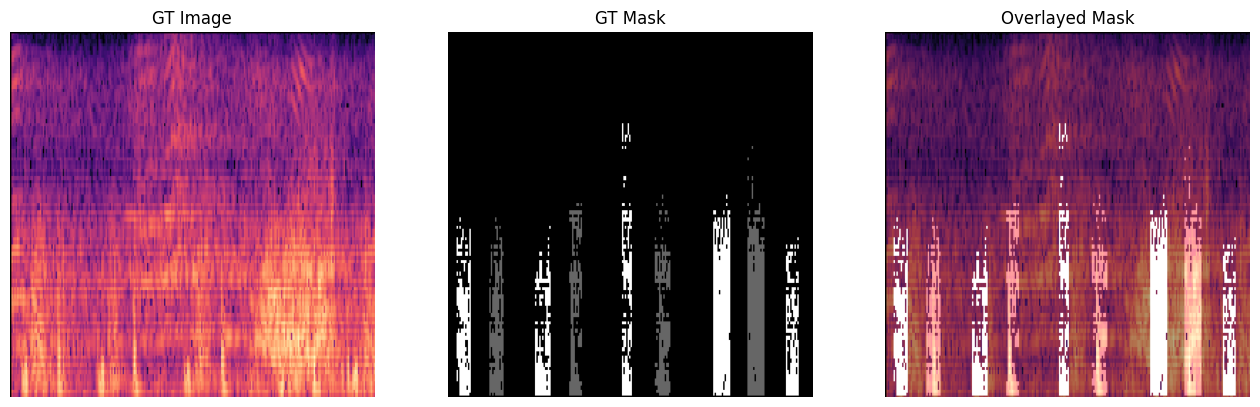

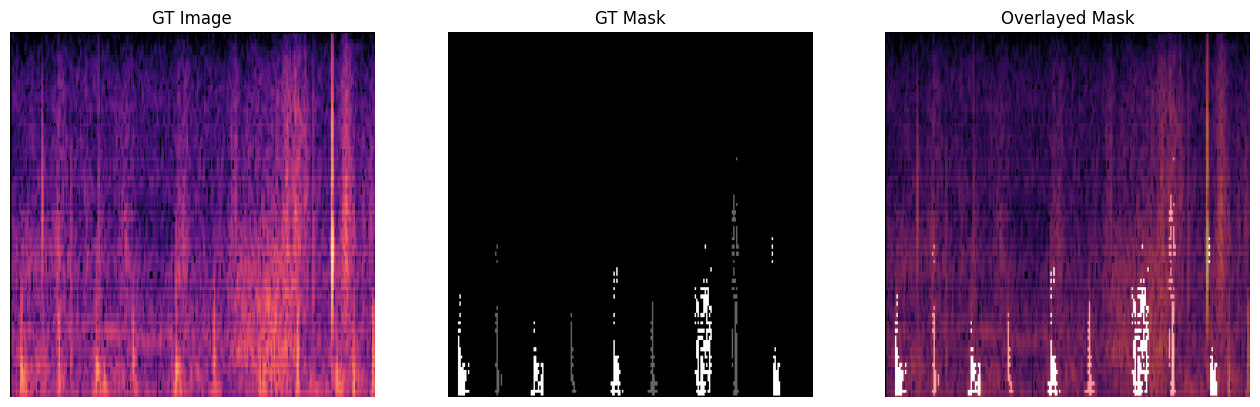

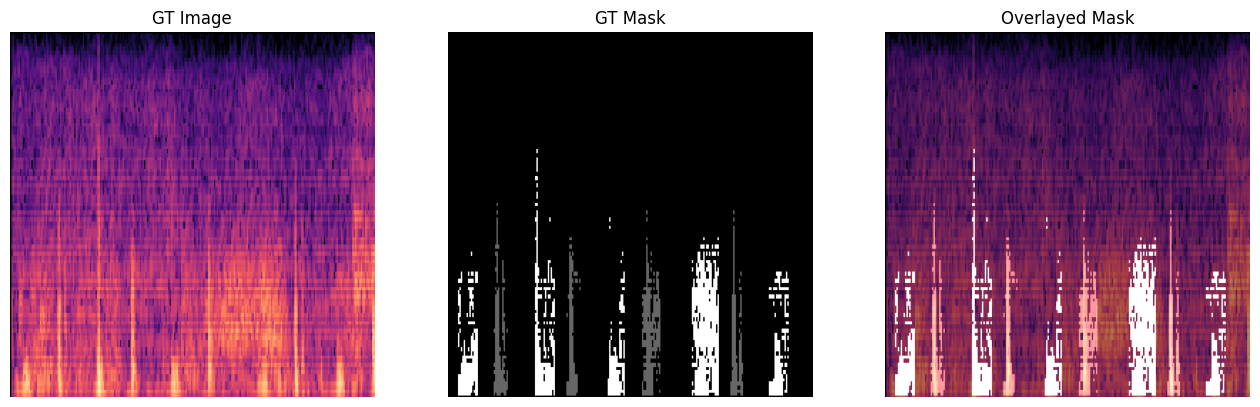

In [28]:
plot_train_ds = train_ds.map(unpackage_inputs).batch(3)
image_batch, mask_batch = next(iter(plot_train_ds.take(1)))

titles = ["GT Image", "GT Mask", "Overlayed Mask"]

for image, gt_mask in zip(image_batch, mask_batch):

    gt_mask = tf.squeeze(gt_mask, axis=-1).numpy()
    display_image_and_mask([image.numpy().astype(np.uint8), gt_mask],
                           title_list=titles,
                           figsize=(16,6),
                           color_mask=True)

In [29]:
augment_fn = tf.keras.Sequential(
    [
        keras_cv.layers.RandomFlip(),
        keras_cv.layers.RandomBrightness(factor=data_config.BRIGHTNESS_FACTOR,
                                         value_range=(0, 255)),
        keras_cv.layers.RandomContrast(factor=data_config.CONTRAST_FACTOR,
                                       value_range=(0, 255)),
    ]
)

In [30]:
train_dataset = (
                train_ds.shuffle(data_config.BATCH_SIZE)
                .map(augment_fn, num_parallel_calls=tf.data.AUTOTUNE)
                .batch(data_config.BATCH_SIZE)
                .map(unpackage_inputs)
                .prefetch(buffer_size=tf.data.AUTOTUNE)
)

valid_dataset = (
                valid_ds.batch(data_config.BATCH_SIZE)
                .map(unpackage_inputs)
                .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [31]:
backbone = keras_cv.models.ResNet50V2Backbone.from_preset(preset = train_config.MODEL,
                                                          input_shape=data_config.IMAGE_SIZE+(3,),
                                                          load_weights = True)
model = keras_cv.models.segmentation.DeepLabV3Plus(
        num_classes=data_config.NUM_CLASSES, backbone=backbone,
    )

100%|██████████| 886/886 [00:00<00:00, 1.25MB/s]
100%|██████████| 90.3M/90.3M [00:02<00:00, 36.0MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [32]:
def get_callbacks(
    train_config,
    monitor="val_mean_iou",
    mode="max",
    save_weights_only=True,
    save_best_only=True,
):

    # Initialize tensorboard callback for logging.
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=train_config.LOGS_DIR,
        histogram_freq=20,
        write_graph=False,
        update_freq="epoch",
    )


    # Update file path if saving best model weights.
    if save_weights_only:
        checkpoint_filepath = train_config.CKPT_DIR

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=save_weights_only,
        monitor=monitor,
        mode=mode,
        save_best_only=save_best_only,
        verbose=1,
    )

    return [tensorboard_callback, model_checkpoint_callback]

In [33]:
def mean_iou(y_true, y_pred):

    # Get total number of classes from model output.
    num_classes = y_pred.shape[-1]

    y_true = tf.squeeze(y_true, axis=-1)

    y_true = tf.one_hot(tf.cast(y_true, tf.int32), num_classes, axis=-1)
    y_pred = tf.one_hot(tf.math.argmax(y_pred, axis=-1), num_classes, axis=-1)

    # Intersection: |G ∩ P|. Shape: (batch_size, num_classes)
    intersection = tf.math.reduce_sum(y_true * y_pred, axis=(1, 2))

    # Total Sum: |G| + |P|. Shape: (batch_size, num_classes)
    total = tf.math.reduce_sum(y_true, axis=(1, 2)) + tf.math.reduce_sum(y_pred, axis=(1, 2))

    union = total - intersection

    is_class_present =  tf.cast(tf.math.not_equal(total, 0), dtype=tf.float32)
    num_classes_present = tf.math.reduce_sum(is_class_present, axis=1)

    iou = tf.math.divide_no_nan(intersection, union)
    iou = tf.math.reduce_sum(iou, axis=1) / num_classes_present

    # Compute the mean across the batch axis. Shape: Scalar
    mean_iou = tf.math.reduce_mean(iou)

    return mean_iou

In [34]:
# Build model.

# Get callbacks.
callbacks = get_callbacks(train_config)
# Define Loss.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
# Compile model.
model.compile(
    optimizer=tf.keras.optimizers.Adam(train_config.LEARNING_RATE),
    loss=loss_fn,
    metrics=["accuracy", mean_iou],
)

In [35]:
model.load_weights('/content/drive/MyDrive/HeartSignal/models/deeplabv3_plus_resnet50_v2.h5')

In [38]:
history = model.fit(
    train_dataset,
    epochs=train_config.EPOCHS,
    validation_data=valid_dataset,
    callbacks=callbacks
)

Epoch 1/15


159/159 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9597 - mean_iou: 0.7046
Epoch 1: val_mean_iou improved from -inf to 0.63854, saving model to checkpoints_resnet50_v2/deeplabv3_plus_resnet50_v2.h5
159/159 [==============================] - 362s 2s/step - loss: 0.0939 - accuracy: 0.9597 - mean_iou: 0.7046 - val_loss: 0.1361 - val_accuracy: 0.9512 - val_mean_iou: 0.6385
Epoch 2/15
159/159 [==============================] - ETA: 0s - loss: 0.0934 - accuracy: 0.9599 - mean_iou: 0.7059
Epoch 2: val_mean_iou did not improve from 0.63854
159/159 [==============================] - 138s 867ms/step - loss: 0.0934 - accuracy: 0.9599 - mean_iou: 0.7059 - val_loss: 0.1422 - val_accuracy: 0.9520 - val_mean_iou: 0.6337
Epoch 3/15
159/159 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.9601 - mean_iou: 0.7068
Epoch 3: val_mean_iou improved from 0.63854 to 0.64880, saving model to checkpoints_resnet50_v2/deeplabv3_plus_resnet50_v2.h5
159/159 [======

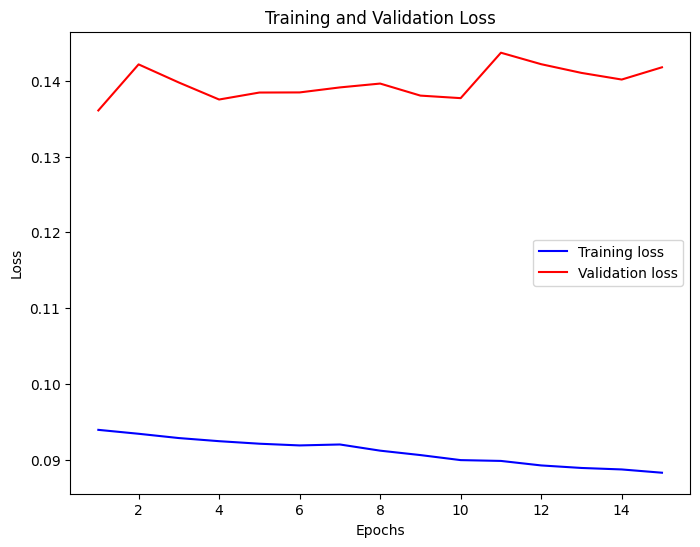

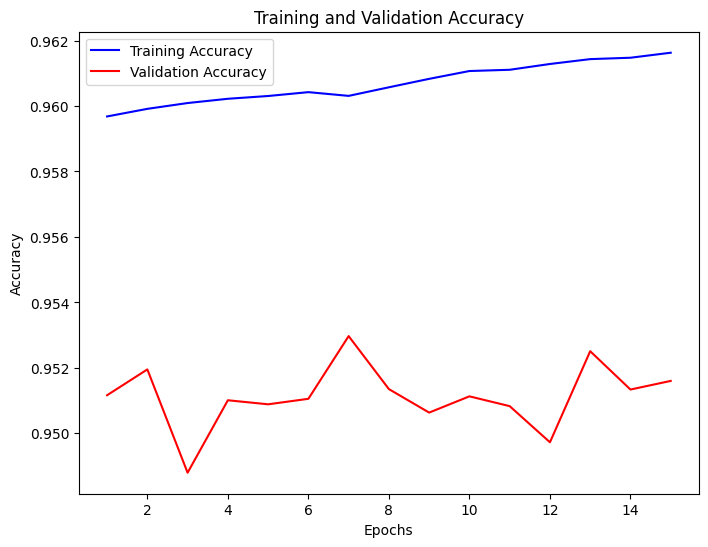

In [39]:
# 에포크 범위 정의
epochs = range(1, train_config.EPOCHS + 1)

# 손실 그래프
plt.figure(figsize=(8, 6))
plt.plot(epochs, history.history["loss"], "b", label="Training loss")
plt.plot(epochs, history.history["val_loss"], "r", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 정확도 그래프
plt.figure(figsize=(8, 6))
plt.plot(epochs, history.history["accuracy"], "b", label="Training Accuracy")
plt.plot(epochs, history.history["val_accuracy"], "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
def save_mask_images(mask, pred, count):
    # GT와 Pred를 위한 디렉토리 생성
    gt_dir = '/content/mask_dir/gt_dir'
    pred_dir = '/content/mask_dir/pred_masks'

    os.makedirs(gt_dir, exist_ok=True)
    os.makedirs(pred_dir, exist_ok=True)

    # GT Mask 저장
    gt_mask_path = os.path.join(gt_dir, f'gt_mask_{count}.png')
    plt.imsave(gt_mask_path, mask, cmap='gray')

    # Pred Mask 저장
    pred_mask_path = os.path.join(pred_dir, f'pred_mask_{count}.png')
    plt.imsave(pred_mask_path, pred, cmap='gray')

    return gt_mask_path, pred_mask_path

In [37]:
def inference(model, dataset, samples_to_plot):
    saved_paths = []
    count = 0
    stop_plot = False

    titles = ["Image", "GT Mask", "Pred Mask", "Overlayed Prediction"]

    for idx, data in enumerate(dataset):
        if stop_plot:
            break

        batch_img, batch_mask = data[0], data[1]
        batch_pred = (model.predict(batch_img)).astype('float32')
        batch_pred = batch_pred.argmax(axis=-1)
        batch_img = batch_img.numpy().astype('uint8')
        batch_mask = batch_mask.numpy().squeeze(axis=-1)

        for image, mask, pred in zip(batch_img, batch_mask, batch_pred):
            display_image_and_mask([image, mask, pred], title_list=titles, figsize=(20,8), color_mask=True)

            # 이미지 저장
            gt_mask_path, pred_mask_path = save_mask_images(mask, pred, count + 1)
            saved_paths.append((gt_mask_path, pred_mask_path))

            count += 1
            if count >= samples_to_plot:
                stop_plot = True
                break

    return saved_paths

In [38]:
test_dataset_random_samples = (
    test_ds.shuffle(buffer_size=len(test_ds))
    .take(10)  # 처음 10개의 샘플만 선택
    .map(unpackage_inputs)
    .batch(1)  # 배치 크기를 1로 설정
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [39]:
test_dataset_full = (
    test_ds
    .map(unpackage_inputs)
    .batch(1)  # 배치 크기를 1로 설정
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

1/1 [==============================] - 2s 2s/step


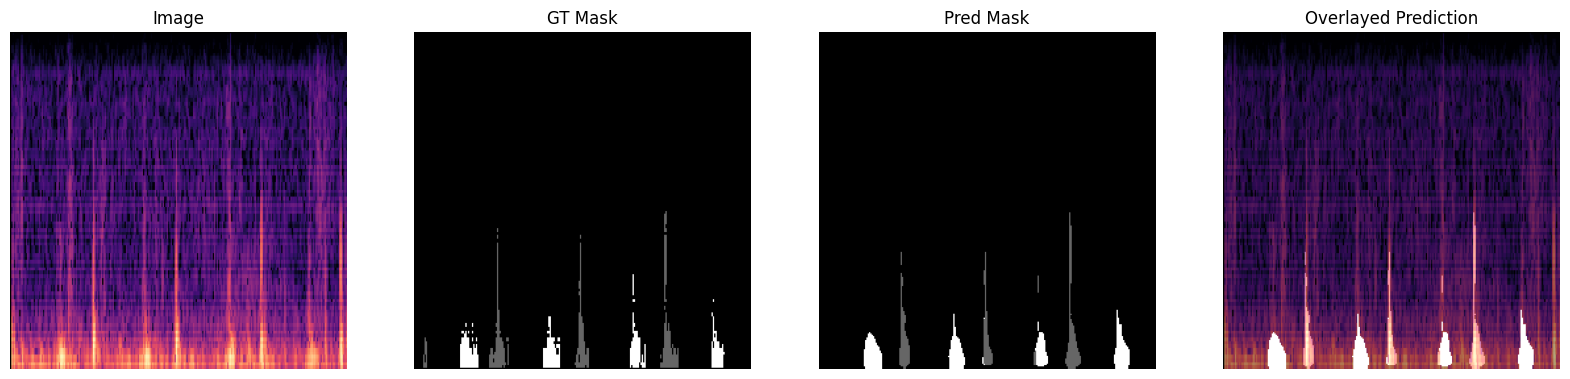

1/1 [==============================] - 1s 706ms/step


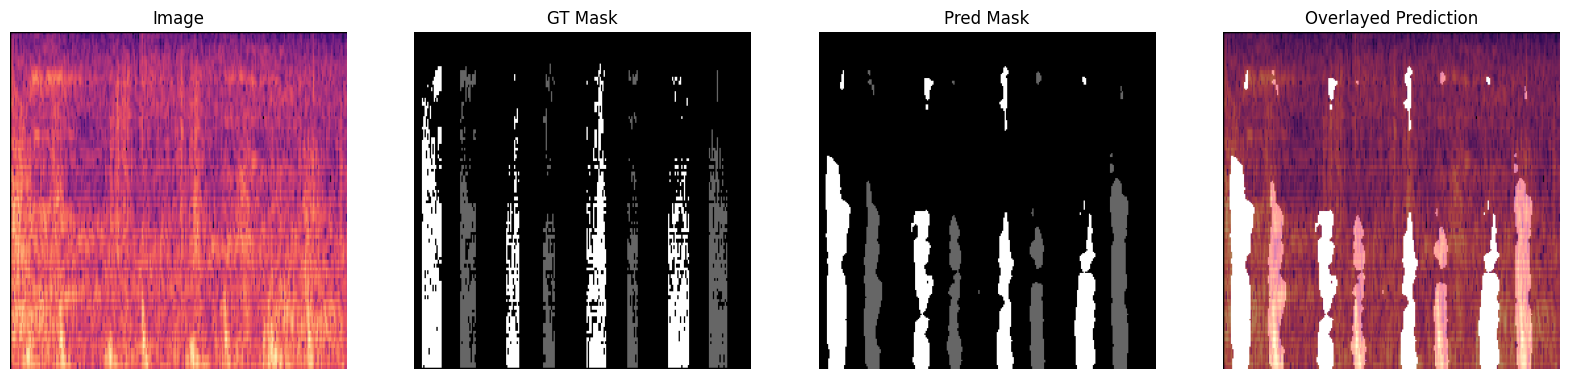

1/1 [==============================] - 1s 703ms/step


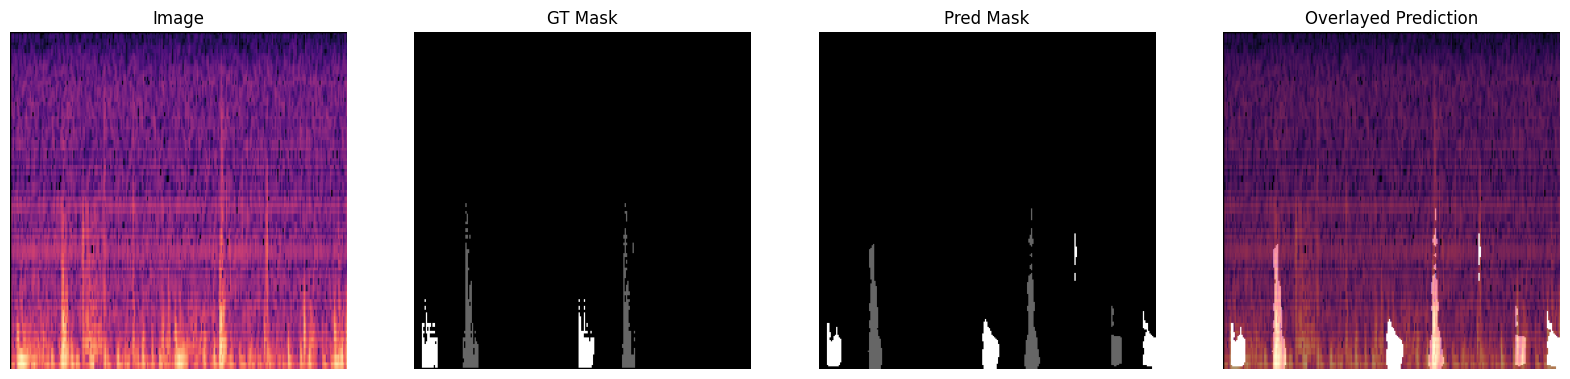

1/1 [==============================] - 1s 687ms/step


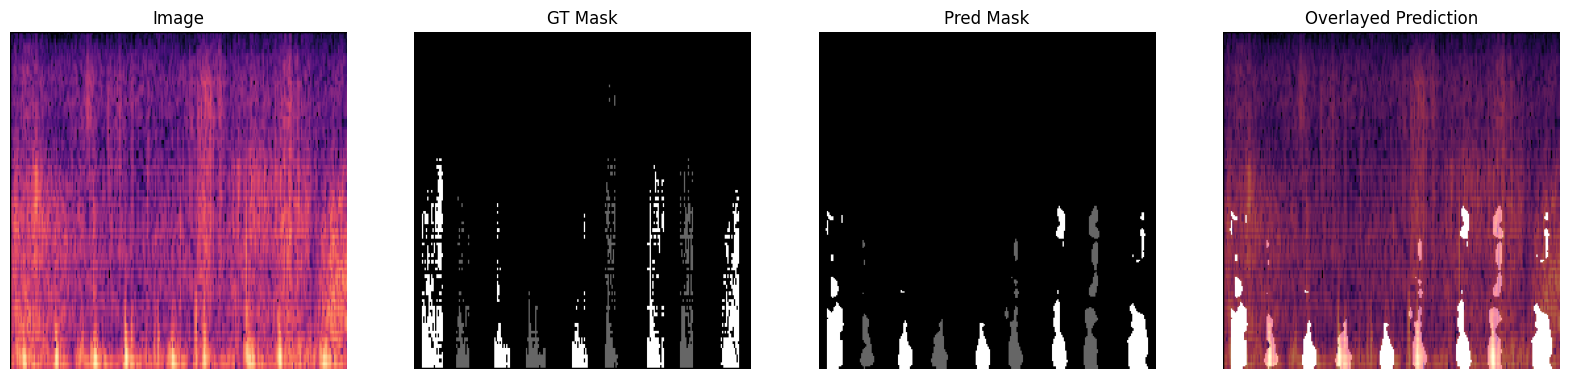

1/1 [==============================] - 1s 1s/step


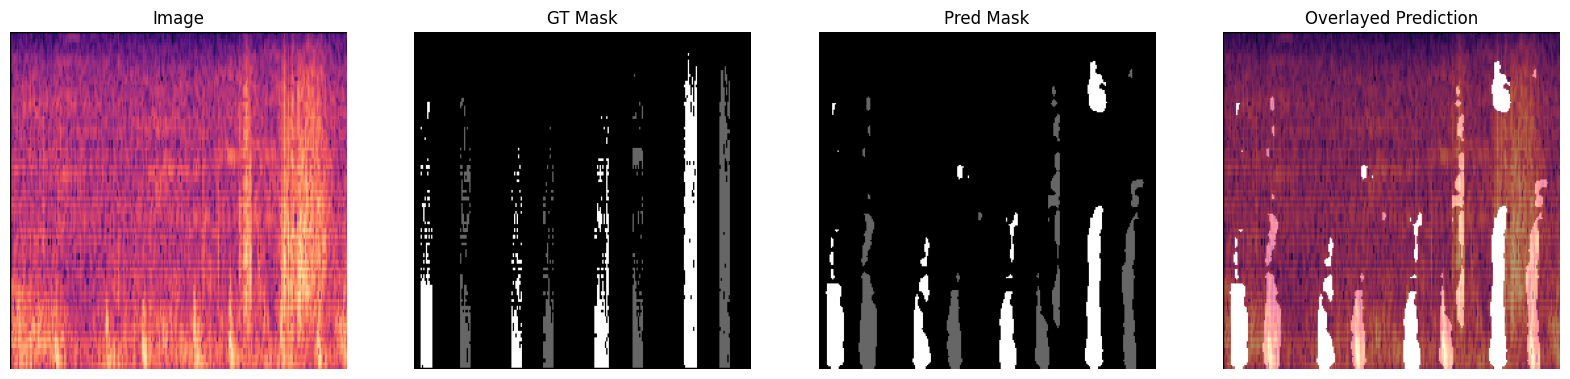

In [40]:
# 추론 함수 실행
saved_image_paths = inference(model, test_dataset_random_samples, 5)

In [41]:
ious = []
for batch_img, batch_mask in test_dataset_random_samples:
    batch_pred = model.predict(batch_img)
    batch_iou = mean_iou(batch_mask, batch_pred)
    ious.append(batch_iou.numpy())

# 평균 IoU 계산
mean_iou_value = np.mean(ious)
print("Mean IoU over the randomly selected test samples:", mean_iou_value)

1/1 [==============================] - 2s 2s/step
Mean IoU over the randomly selected test samples: 0.66535884


In [42]:
losses = []
accuracies = []

for batch_img, batch_label in test_dataset_random_samples:
    # 모델 예측
    batch_pred = model.predict(batch_img)

    # 배치별 손실 계산
    batch_loss = tf.keras.losses.sparse_categorical_crossentropy(batch_label, batch_pred, from_logits=False)
    batch_loss_mean = tf.reduce_mean(batch_loss).numpy()
    losses.append(batch_loss_mean)

mean_loss = np.mean(losses)

print("Mean Loss over the test samples:", mean_loss)

1/1 [==============================] - 1s 1s/step
Mean Loss over the test samples: 0.23411398


In [43]:
# 전체 데이터셋에 대해서 추론 진행
saved_image_paths_full = inference(model, test_dataset_full, samples_to_plot=len(test_ds))

Output hidden; open in https://colab.research.google.com to view.

In [44]:
ious = []
for batch_img, batch_mask in test_dataset_full:
    batch_pred = model.predict(batch_img)
    batch_iou = mean_iou(batch_mask, batch_pred)
    ious.append(batch_iou.numpy())

# 평균 IoU 계산
mean_iou_value = np.mean(ious)
print("Mean IoU over the randomly selected test samples:", mean_iou_value)

1/1 [==============================] - 1s 692ms/step
Mean IoU over the randomly selected test samples: 0.6543133


In [45]:
losses = []
accuracies = []

for batch_img, batch_label in test_dataset_full:
    # 모델 예측
    batch_pred = model.predict(batch_img)

    # 배치별 손실 계산
    batch_loss = tf.keras.losses.sparse_categorical_crossentropy(batch_label, batch_pred, from_logits=False)
    batch_loss_mean = tf.reduce_mean(batch_loss).numpy()
    losses.append(batch_loss_mean)

mean_loss = np.mean(losses)

print("Mean Loss over the test samples:", mean_loss)

1/1 [==============================] - 1s 1s/step
Mean Loss over the test samples: 0.14796701


**성능 평가**
> 1. mean_iou, mean_loss

> 2. 심박수 체크(얼마나 많이 S1, S2로 추정되는 기둥이 나타나는지)

> 3. S1, S2의 시간축의 gt시간과 pred 시간이 얼마나 겹치는지 확인

In [ ]:
# gt image 색상값 확인
gt_dir_1 = '/content/mask_dir/gt_dir/gt_mask_2.png'
gt_image = load_img(gt_dir_1,color_mode='grayscale')
gt_image = img_to_array(gt_image)
gt_image = gt_image.astype("uint8")
gt_color = np.unique(gt_image)
gt_color

array([  0, 128, 255], dtype=uint8)

In [ ]:
# pred image 색상값 확인
pred_dir_1 = '/content/mask_dir/pred_masks/pred_mask_2.png'
pred_image = load_img(pred_dir_1,color_mode='grayscale')
pred_image = img_to_array(pred_image)
pred_image = pred_image.astype("uint8")
pred_color = np.unique(pred_image)
pred_color

array([  0, 128, 255], dtype=uint8)

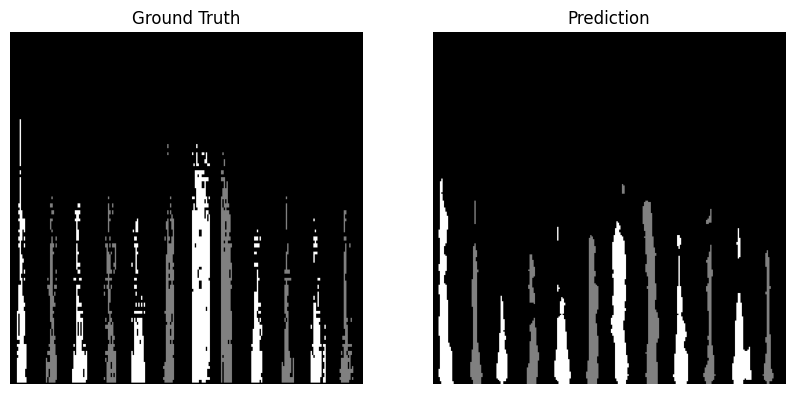

In [ ]:
plt.figure(figsize=(10, 5))  # 전체 플롯 크기 설정

# 첫 번째 이미지 표시
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 위치에 플롯 생성
plt.imshow(gt_image.squeeze(), cmap='gray')
plt.axis('off')
plt.title('Ground Truth')

# 두 번째 이미지 표시
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 위치에 플롯 생성
plt.imshow(pred_image.squeeze(), cmap='gray')
plt.axis('off')
plt.title('Prediction')

plt.show()

In [ ]:
print(gt_image.shape)
print(pred_image.shape)

(256, 256, 1)
(256, 256, 1)


In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def fill_below_found_color(image_path, output_dir):
    # 이미지 로드 및 배열로 변환
    image = load_img(image_path, color_mode='grayscale')
    image = img_to_array(image)
    image = image.astype("uint8")

    # OpenCV로 이미지 변환 (넘파이 배열을 OpenCV 이미지로 변환)
    image_cv = np.uint8(image)

    # 이미지 크기
    height, width = image.shape[:2]

    # 각 열을 순회하며 특정 색상의 픽셀 아래 부분을 같은 색으로 채우기
    for x in range(width):
        for y in range(height):
            pixel_color = image_cv[y, x, 0]
            if pixel_color == 255 or pixel_color == 128:  # 흰색 또는 회색 픽셀 발견
                image_cv[y:, x, 0] = pixel_color  # 해당 위치부터 아래까지 같은 색으로 채움
                break  # 해당 열에서 색상을 찾으면 나머지 행은 무시

    # 원본 파일명을 기반으로 고유한 출력 파일 경로 생성
    base_filename = os.path.basename(image_path)
    output_filename = f"preprocessed_{base_filename}"
    output_path = os.path.join(output_dir, output_filename)

    # 수정된 이미지 저장
    cv2.imwrite(output_path, image_cv)

    return output_path

In [47]:
def process_images(directory, output_directory):
    # 지정된 디렉토리의 .png 파일 목록을 가져오고 정렬
    file_list = sorted([file for file in os.listdir(directory) if file.lower().endswith('.png')])

    processed_files = []
    for filename in file_list:
        file_path = os.path.join(directory, filename)
        processed_image_path = fill_below_found_color(file_path, output_directory)
        processed_files.append(processed_image_path)

    return processed_files

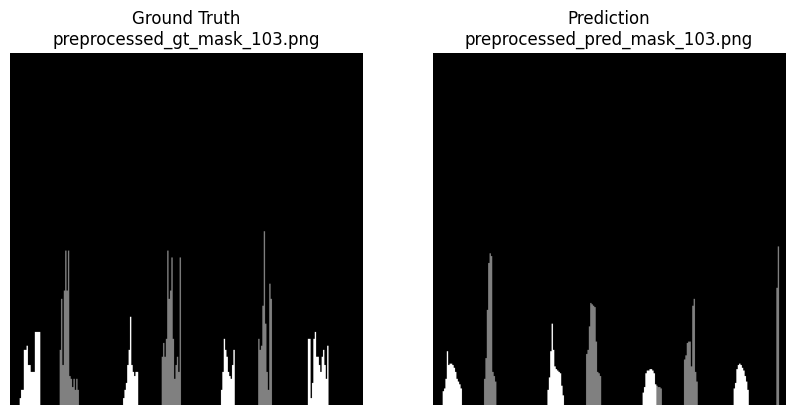

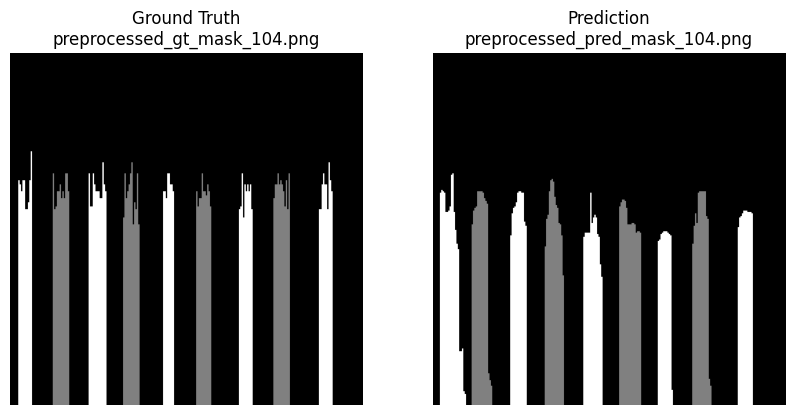

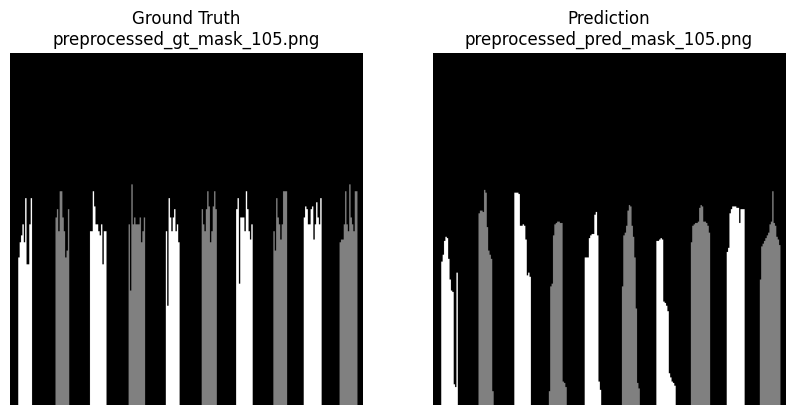

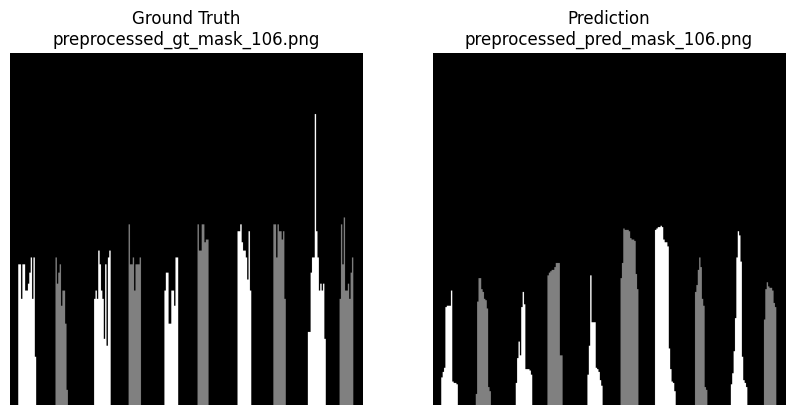

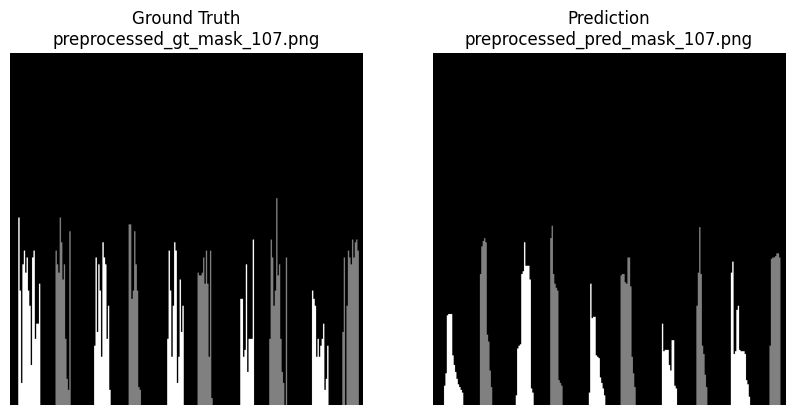

In [81]:
gt_dir = '/content/mask_dir/gt_dir'
output_gt_dir = '/content/mask_dir/gt_dir_pre'
pred_masks = '/content/mask_dir/pred_masks'
output_masks_dir = '/content/mask_dir/pred_masks_pre'

# 출력 디렉토리 확인 및 생성
if not os.path.exists(output_gt_dir):
    os.makedirs(output_gt_dir)
if not os.path.exists(output_masks_dir):
    os.makedirs(output_masks_dir)

# 이미지 처리 및 파일 경로 저장
processed_files_gt = process_images(gt_dir, output_gt_dir)
processed_files_pred = process_images(pred_masks, output_masks_dir)

# 비교를 위해 같은 인덱스의 이미지를 선택
for gt_path, pred_path in zip(processed_files_gt[5:10], processed_files_pred[5:10]):
    img_gt = mpimg.imread(gt_path)
    img_pred = mpimg.imread(pred_path)

    gt_filename = os.path.basename(gt_path)
    pred_filename = os.path.basename(pred_path)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_gt, cmap='gray')
    plt.axis('off')
    plt.title(f'Ground Truth\n{gt_filename}')

    plt.subplot(1, 2, 2)
    plt.imshow(img_pred, cmap='gray')
    plt.axis('off')
    plt.title(f'Prediction\n{pred_filename}')

    plt.show()

In [59]:
def find_and_count_columns(image_path):
    # 이미지 로드 및 배열로 변환
    image = load_img(image_path, color_mode='grayscale')
    image = img_to_array(image)
    image = image.astype("uint8")

    # OpenCV로 이미지 변환
    image_cv = np.uint8(image)

    # 이미지 크기
    height, width = image.shape[:2]

    # 각 기둥의 시작과 끝 위치를 저장할 리스트 및 카운트
    white_columns = []
    gray_columns = []
    white_columns_count = 0
    gray_columns_count = 0

    # 255번째 행에서 기둥의 범위 찾기 및 카운트
    y = 255
    in_white_column = False
    in_gray_column = False
    white_start = 0
    gray_start = 0

    for x in range(width):
        column_color = image_cv[y, x, 0]

        # 흰색 기둥 처리
        if column_color == 255:
            if not in_white_column:
                in_white_column = True
                white_start = x
            elif x == width - 1 and white_start != x:
                # 픽셀 길이가 3 초과인 경우만 처리
                if x - white_start > 3:
                    white_columns.append((white_start, x))
                    white_columns_count += 1
        elif in_white_column:
            in_white_column = False
            # 픽셀 길이가 3 초과인 경우만 처리
            if white_start != x - 1 and x - 1 - white_start > 3:
                white_columns.append((white_start, x - 1))
                white_columns_count += 1

        # 회색 기둥 처리
        if column_color == 128:
            if not in_gray_column:
                in_gray_column = True
                gray_start = x
            elif x == width - 1 and gray_start != x:
                # 픽셀 길이가 3 초과인 경우만 처리
                if x - gray_start > 3:
                    gray_columns.append((gray_start, x))
                    gray_columns_count += 1
        elif in_gray_column:
            in_gray_column = False
            # 픽셀 길이가 3 초과인 경우만 처리
            if gray_start != x - 1 and x - 1 - gray_start > 3:
                gray_columns.append((gray_start, x - 1))
                gray_columns_count += 1

        # Extract filename from image_path
    file_name = os.path.basename(image_path)

    return white_columns, gray_columns, white_columns_count, gray_columns_count, file_name

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the directory path
directory_path_gt = '/content/mask_dir/gt_dir_pre'
# List all files in the directory
files_gt = os.listdir(directory_path_gt)
files_gt = sorted(files_gt)

all_white_columns_gt = []
all_gray_columns_gt = []
all_white_counts_gt = []
all_gray_counts_gt = []
file_name_gt = []

# Loop through each file
for file_gt in files_gt:
    # Construct the full file path
    file_path_gt = os.path.join(directory_path_gt, file_gt)
    # Call your function
    gt_white_columns, gt_gray_columns, gt_white_count, gt_gray_count, gt_file_name = find_and_count_columns(file_path_gt)

    all_white_columns_gt.append(gt_white_columns)
    all_gray_columns_gt.append(gt_gray_columns)
    all_white_counts_gt.append(gt_white_count)
    all_gray_counts_gt.append(gt_gray_count)
    file_name_gt.append(gt_file_name)

print(f'Ground Truth S1 심음 픽셀 길이: {all_white_columns_gt[0]}')
print(f'Ground Truth S2 심음 픽셀 길이: {all_gray_columns_gt[0]}')
print(f'Ground Truth S1 심음: {all_white_counts_gt[0]}')
print(f'Ground Truth S2 심음: {all_gray_counts_gt[0]}')
print(f'파일이름: {file_name_gt[0]}')

Ground Truth S1 심음 픽셀 길이: [(9, 22), (72, 83), (127, 139), (187, 200)]
Ground Truth S2 심음 픽셀 길이: [(33, 46), (92, 104), (154, 165), (209, 223)]
Ground Truth S1 심음: 4
Ground Truth S2 심음: 4
파일이름: preprocessed_gt_mask_1.png


In [65]:
print(f'Ground Truth S1 심음 픽셀 길이: {all_white_columns_gt[10]}')
print(f'Ground Truth S2 심음 픽셀 길이: {all_gray_columns_gt[10]}')
print(f'Ground Truth S1 심음: {all_white_counts_gt[10]}')
print(f'Ground Truth S2 심음: {all_gray_counts_gt[10]}')
print(f'파일이름: {file_name_gt[10]}')

Ground Truth S1 심음 픽셀 길이: [(6, 15), (62, 71), (117, 124), (168, 186), (222, 231)]
Ground Truth S2 심음 픽셀 길이: [(29, 38), (84, 95), (137, 151), (193, 202), (245, 253)]
Ground Truth S1 심음: 5
Ground Truth S2 심음: 5
파일이름: preprocessed_gt_mask_108.png


In [77]:
directory_path_pred = '/content/mask_dir/pred_masks_pre'
files_pred = os.listdir(directory_path_pred)
files_pred = sorted(files_pred)

all_white_columns_pred = []
all_gray_columns_pred = []
all_white_counts_pred = []
all_gray_counts_pred = []
file_name_pred = []

# Loop through each file
for file_pred in files_pred:
    # Construct the full file path
    file_path_pred = os.path.join(directory_path_pred, file_pred)
    # Call your function
    pred_white_columns, pred_gray_columns, pred_white_count, pred_gray_count, pred_file_name = find_and_count_columns(file_path_pred)

    all_white_columns_pred.append(pred_white_columns)
    all_gray_columns_pred.append(pred_gray_columns)
    all_white_counts_pred.append(pred_white_count)
    all_gray_counts_pred.append(pred_gray_count)
    file_name_pred.append(pred_file_name)

print(f'Prediction Truth S1 심음 픽셀 길이: {all_white_columns_pred[0]}')
print(f'Prediction Truth S2 심음 픽셀 길이: {all_gray_columns_pred[0]}')
print(f'Prediction Truth S1 심음: {all_white_counts_pred[0]}')
print(f'Prediction Truth S2 심음: {all_gray_counts_pred[0]}')
print(f'파일이름: {file_name_pred[0]}')

Prediction Truth S1 심음 픽셀 길이: [(9, 20), (72, 82), (130, 140), (188, 197)]
Prediction Truth S2 심음 픽셀 길이: [(33, 44), (93, 105), (155, 164), (209, 221)]
Prediction Truth S1 심음: 4
Prediction Truth S2 심음: 4
파일이름: preprocessed_pred_mask_1.png


In [78]:
print(f'Prediction Truth S1 심음 픽셀 길이: {all_white_columns_pred[10]}')
print(f'Prediction Truth S2 심음 픽셀 길이: {all_gray_columns_pred[10]}')
print(f'Prediction Truth S1 심음: {all_white_counts_pred[10]}')
print(f'Prediction Truth S2 심음: {all_gray_counts_pred[10]}')
print(f'파일이름: {file_name_pred[10]}')

Prediction Truth S1 심음 픽셀 길이: [(6, 14), (61, 69), (115, 123), (164, 179), (220, 230)]
Prediction Truth S2 심음 픽셀 길이: [(31, 39), (86, 94), (137, 150), (194, 201), (245, 251)]
Prediction Truth S1 심음: 5
Prediction Truth S2 심음: 5
파일이름: preprocessed_pred_mask_108.png


In [68]:
def calculate_overlap_percentage(gt_columns, pred_columns):
    overlap_percentages = []

    for gt_start, gt_end in gt_columns:
        gt_length = gt_end - gt_start
        max_overlap = 0

        for pred_start, pred_end in pred_columns:
            # 겹치는 부분 찾기
            overlap_start = max(gt_start, pred_start)
            overlap_end = min(gt_end, pred_end)
            if overlap_start < overlap_end:  # 실제 겹침이 있는 경우
                overlap_length = overlap_end - overlap_start
                max_overlap = max(max_overlap, overlap_length)

        # 겹침 비율 계산
        if gt_length > 0:
            overlap_percentage = (max_overlap / gt_length) * 100
            overlap_percentages.append(overlap_percentage)
        else:
            overlap_percentages.append(0)

    return overlap_percentages

In [70]:
# Ground Truth와 Prediction 비교
# 313개 테스트에 대한 평균 정확도 추정
white_overlap_percentages = calculate_overlap_percentage(all_white_columns_gt[0], all_white_columns_pred[0])
gray_overlap_percentages = calculate_overlap_percentage(all_gray_columns_gt[0], all_gray_columns_pred[0])

# 결과 출력
for i, percentage in enumerate(white_overlap_percentages):
    print(f'S1 심음 {i+1}: 겹침 비율 {percentage:.2f}%')
print('--------------------------------')
for i, percentage in enumerate(gray_overlap_percentages):
    print(f'S2 심음 {i+1}: 겹침 비율 {percentage:.2f}%')

S1 심음 1: 겹침 비율 84.62%
S1 심음 2: 겹침 비율 90.91%
S1 심음 3: 겹침 비율 75.00%
S1 심음 4: 겹침 비율 69.23%
--------------------------------
S2 심음 1: 겹침 비율 84.62%
S2 심음 2: 겹침 비율 91.67%
S2 심음 3: 겹침 비율 81.82%
S2 심음 4: 겹침 비율 85.71%


In [76]:
total_white_overlap = 0
total_gray_overlap = 0
num_files = len(all_white_columns_gt)

for i in range(num_files):
    # Calculate overlap percentages for each file
    white_overlap = calculate_overlap_percentage(all_white_columns_gt[i], all_white_columns_pred[i])
    gray_overlap = calculate_overlap_percentage(all_gray_columns_gt[i], all_gray_columns_pred[i])

    # Compute file-wise average if there are columns
    avg_white_overlap_file = sum(white_overlap) / len(white_overlap) if white_overlap else 0
    avg_gray_overlap_file = sum(gray_overlap) / len(gray_overlap) if gray_overlap else 0

    # Accumulate the averages
    total_white_overlap += avg_white_overlap_file
    total_gray_overlap += avg_gray_overlap_file

# Calculate overall average overlap percentages
avg_white_overlap = total_white_overlap / num_files
avg_gray_overlap = total_gray_overlap / num_files

# Print the results
print(f'Overall Average Overlap Percentage for S1 (White): {avg_white_overlap:.2f}%')
print(f'Overall Average Overlap Percentage for S2 (Gray): {avg_gray_overlap:.2f}%')

Overall Average Overlap Percentage for S1 (White): 83.83%
Overall Average Overlap Percentage for S2 (Gray): 82.04%


In [88]:
guess_ave = 0
total_images = len(all_white_counts_gt)

for i in range(total_images):
    gt_white_count = all_white_counts_gt[i]
    gt_gray_count = all_gray_counts_gt[i]
    heart_beat_gt = (gt_white_count + gt_gray_count) / 2

    pred_white_count = all_white_counts_pred[i]
    pred_gray_count = all_gray_counts_pred[i]
    heart_beat_pred = (pred_white_count + pred_gray_count) / 2

    # Avoid division by zero
    if heart_beat_gt != 0:
        guess_by_file = (heart_beat_pred / heart_beat_gt) * 100
    else:
        guess_by_file = 0

    if heart_beat_gt == heart_beat_pred:
        guess_ave += 1

    # Print results for each file
    print(f'File: {file_name_gt[i]}')
    print(f'GT 심박수:{heart_beat_gt}', f'Pred 심박수:{heart_beat_pred}')
    print('--------------------------------')

# Calculate overall accuracy
guess_ave = (guess_ave / total_images) * 100
print(f'전체 심박수 추측 정확도:{guess_ave:.2f}%')

File: preprocessed_gt_mask_1.png
GT 심박수:4.0 Pred 심박수:4.0
--------------------------------
File: preprocessed_gt_mask_10.png
GT 심박수:5.0 Pred 심박수:5.0
--------------------------------
File: preprocessed_gt_mask_100.png
GT 심박수:4.5 Pred 심박수:4.5
--------------------------------
File: preprocessed_gt_mask_101.png
GT 심박수:4.0 Pred 심박수:4.0
--------------------------------
File: preprocessed_gt_mask_102.png
GT 심박수:4.0 Pred 심박수:4.0
--------------------------------
File: preprocessed_gt_mask_103.png
GT 심박수:3.5 Pred 심박수:3.5
--------------------------------
File: preprocessed_gt_mask_104.png
GT 심박수:4.5 Pred 심박수:4.5
--------------------------------
File: preprocessed_gt_mask_105.png
GT 심박수:5.0 Pred 심박수:5.0
--------------------------------
File: preprocessed_gt_mask_106.png
GT 심박수:5.0 Pred 심박수:5.0
--------------------------------
File: preprocessed_gt_mask_107.png
GT 심박수:5.0 Pred 심박수:5.0
--------------------------------
File: preprocessed_gt_mask_108.png
GT 심박수:5.0 Pred 심박수:5.0
------------------------

## 모델 정의 및 학습

**U-Net**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def build_model(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)
    #Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(rescaling)
    conv1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv5)

    #Expanding Path
    up6 = Conv2DTranspose(512, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv5)
    merge6 = concatenate([conv4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv6)
    up7 = Conv2DTranspose(256, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv6)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv7)
    up8 = Conv2DTranspose(128, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv7)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv8)
    up9 = Conv2DTranspose(64, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv8)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv9)
    conv10 = Conv2D(num_classes, 3, activation='softmax', padding='same',kernel_initializer='he_normal')(conv9)

    model = Model(inputs = inputs, outputs = conv10)
    return model

In [ ]:
model = build_model(img_size=img_size, num_classes=3) # num_classes = 3
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['rescaling[0][0]']           
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model_unet.keras", save_best_only=True)

history = model.fit(train_input_imgs, train_targets,
                    epochs=100,
                    callbacks=callbacks,
                    batch_size=16,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/100
159/159 [==============================] - 205s 1s/step - loss: 0.2134 - accuracy: 0.9237 - val_loss: 0.1089 - val_accuracy: 0.9595
Epoch 2/100
159/159 [==============================] - 127s 797ms/step - loss: 0.1007 - accuracy: 0.9622 - val_loss: 0.0996 - val_accuracy: 0.9613
Epoch 3/100
159/159 [==============================] - 123s 775ms/step - loss: 0.0894 - accuracy: 0.9662 - val_loss: 0.0851 - val_accuracy: 0.9675
Epoch 4/100
159/159 [==============================] - 127s 796ms/step - loss: 0.0834 - accuracy: 0.9685 - val_loss: 0.0806 - val_accuracy: 0.9681
Epoch 5/100
159/159 [==============================] - 123s 776ms/step - loss: 0.0784 - accuracy: 0.9703 - val_loss: 0.0738 - val_accuracy: 0.9720
Epoch 6/100
159/159 [==============================] - 121s 758ms/step - loss: 0.0779 - accuracy: 0.9704 - val_loss: 0.0825 - val_accuracy: 0.9680
Epoch 7/100
159/159 [==============================] - 123s 771ms/step - loss: 0.0752 - accuracy: 0.9716 - val_loss: 0.07

## 학습 결과 평가 - Unet

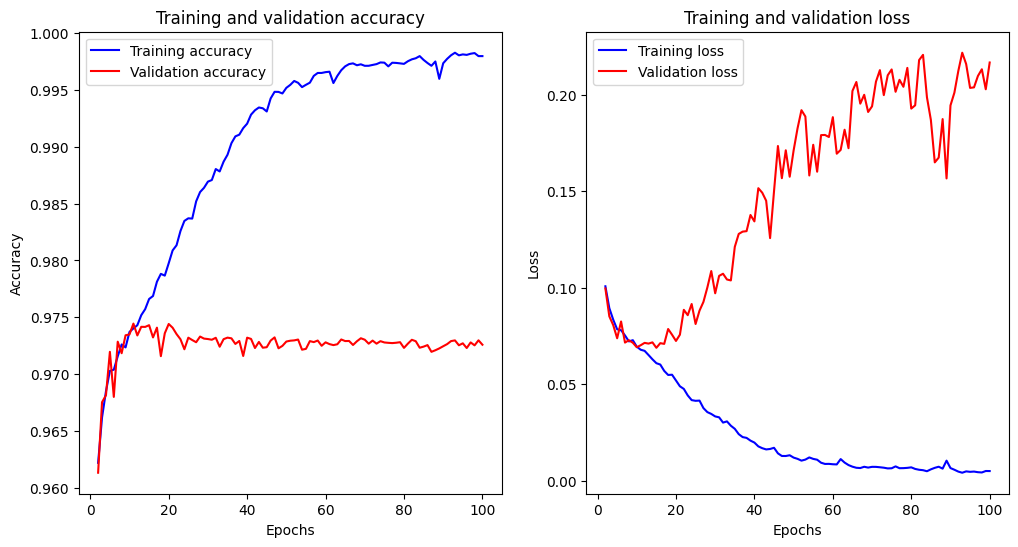

In [ ]:
# 손실 그래프
epochs = range(2, len(history.history["loss"]) + 1)
loss = history.history["loss"][1:] # 1의 손실 함수가 너무 커서 제외
val_loss = history.history["val_loss"][1:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc = history.history["accuracy"][1:]
val_acc = history.history["val_accuracy"][1:]

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model

test_loss, test_accuracy = model.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10/10 [==============================] - 40s 2s/step - loss: 0.2182 - accuracy: 0.9712
Test Loss: 0.2181517332792282
Test Accuracy: 0.9712231755256653


In [ ]:
prediction = model.predict(test_input_imgs)

10/10 [==============================] - 4s 442ms/step


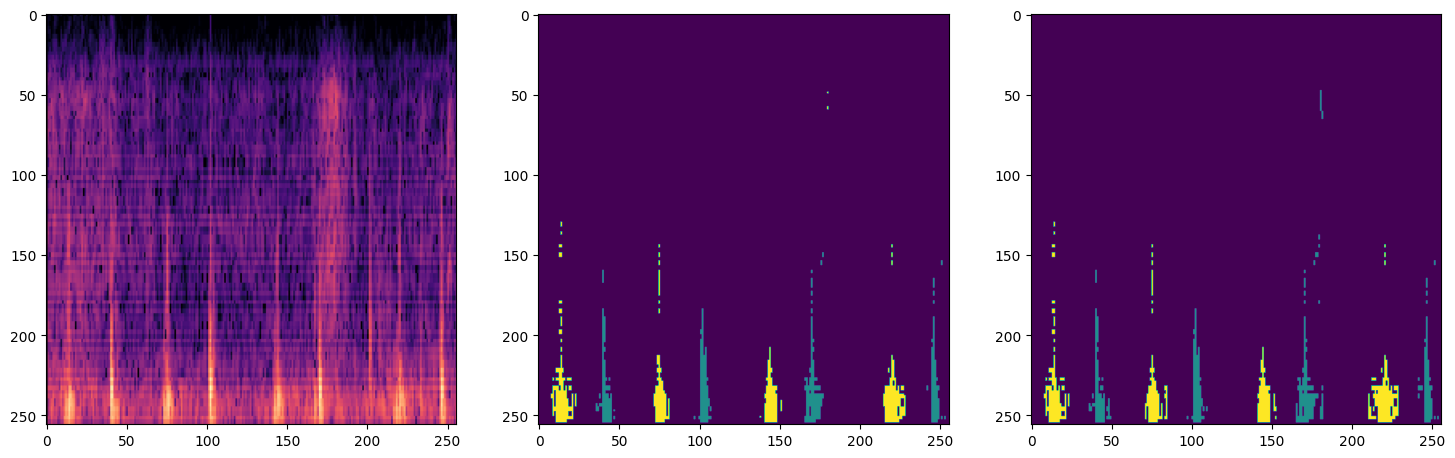

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[0]/255)

plt.subplot(1,3,2)
output = np.argmax(prediction[0], axis=-1)
plt.imshow(output)

plt.subplot(1,3,3)
plt.imshow(test_targets[0])

In [ ]:
def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)
    return iou

In [ ]:
# IoU 계산 및 출력
iou_values = []

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    output = np.argmax(prediction[i], axis=-1)
    plt.imshow(output)
    plt.title("Predicted Segmentation")

    plt.subplot(1, 3, 3)
    plt.imshow(test_targets[i])
    plt.title("True Segmentation")

    # IoU 계산 및 출력
    iou = calculate_iou(test_targets[i], output)
    iou_values.append(iou)
    print(f"IoU for sample {i + 1}: {iou}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [ ]:
# 전체 평균 IoU 출력
average_iou = np.mean(iou_values)
print(f"\nAverage IoU across all samples: {average_iou}")


Average IoU across all samples: 0.03806770618704016


**클래스 별로 IoU 구하는 새로운 IoU 만들어 보자!**

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# IoU 계산 함수
def calculate_iou(y_true, y_pred, class_index):
    intersection = np.logical_and(y_true == class_index, y_pred == class_index)
    union = np.logical_or(y_true == class_index, y_pred == class_index)
    iou = np.sum(intersection) / np.sum(union)
    return iou

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    # plt.subplot(1, 4, 1)
    # plt.imshow(test_input_imgs[i] / 255)
    # plt.title("Input Image")

    for class_index in range(3):  # 클래스 수에 따라 반복
        plt.subplot(2, 3, class_index + 1)
        output = np.argmax(prediction[i], axis=-1)
        plt.imshow(output == class_index)
        plt.title(f"Predicted Class {class_index}")

        plt.subplot(2, 3, class_index + 4)
        plt.imshow(test_targets[i]==class_index)
        plt.title(f"Target Class {class_index}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [ ]:
def calculate_iou_score(target, prediction):
# 각 픽셀별로 어떤 클래스로 예측하고 있는지를 알아야 함
# (128, 128, 6) -> (128, 128, 1)
    one_c_prediction = np.argmax(prediction, axis=2)
    one_c_target = target[:, :, 0]

    # 이미지의 전체 영역 크기 계산
    total_area = one_c_prediction.shape[0] ** 2

    # 각 클래스에 대한 IoU 및 영역 정보를 저장할 리스트 초기화
    IoUs = []
    areas = []

    for class_i in range(3):
        # 해당 클래스에 속하는 픽셀을 True로 설정
        pred = np.where(one_c_prediction==class_i, True, False)
        target = np.where(one_c_target==class_i, True, False)

        intersection = np.logical_and(target, pred) # 교집합
        union = np.logical_or(target, pred) # 합집합
        iou_score = np.sum(intersection) / np.sum(union)

        IoUs.append(iou_score) # IoU 결과 리스트 추가

        # 해당 클래스가 차지하는 영역 구하기
        area = pred.sum() / total_area
        areas.append(area)

    return IoUs, areas

In [ ]:
IoUs, areas = calculate_iou_score(targets[0], prediction[0])

In [ ]:
sum(IoUs) / 3

In [ ]:
sum([iou * area for iou, area in zip(IoUs, areas)]) # 영역의 크기로 가중치

**U-net++**

In [ ]:
from keras.layers import UpSampling2D
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Rescaling
from keras.models import Model

def build_model2(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)
    # X0,0
    conv0_0 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(inputs)
    conv0_0 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_0)
    pool0_0 = MaxPooling2D(pool_size=(2, 2))(conv0_0)
    # X1,0
    conv1_0 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool0_0)
    conv1_0 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_0)
    pool1_0 = MaxPooling2D(pool_size=(2, 2))(conv1_0)
    # X2,0
    conv2_0 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool1_0)
    conv2_0 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_0)
    pool2_0 = MaxPooling2D(pool_size=(2, 2))(conv2_0)
    # X3,0
    conv3_0 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool2_0)
    conv3_0 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3_0)
    pool3_0 = MaxPooling2D(pool_size=(2, 2))(conv3_0)
    # X4,0
    conv4_0 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool3_0)
    conv4_0 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv4_0)

    # X0,1
    up1_0 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_0))
    merge0_1 = concatenate([up1_0, conv0_0], axis = 3)
    conv0_1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_1)
    conv0_1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_1)
    # X1,1
    up2_0 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_0))
    merge1_1 = concatenate([up2_0, conv1_0], axis = 3)
    conv1_1 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_1)
    conv1_1 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_1)
    # X2,1
    up3_0 = Conv2D(256, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv3_0))
    merge2_1 = concatenate([up3_0, conv2_0], axis = 3)
    conv2_1 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge2_1)
    conv2_1 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_1)
    # X3,1
    up4_0 = Conv2D(512, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv4_0))
    merge3_1 = concatenate([up4_0, conv3_0], axis = 3)
    conv3_1 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge3_1)
    conv3_1 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3_1)

    # X0,2
    up1_1 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_1))
    merge0_2 = concatenate([up1_1, conv0_0, conv0_1], axis = 3)
    conv0_2 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_2)
    conv0_2 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_2)
    # X1,2
    up2_1 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_1))
    merge1_2 = concatenate([up2_1, conv1_0, conv1_0], axis = 3)
    conv1_2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_2)
    conv1_2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_2)
    # X2,2
    up3_1 = Conv2D(256, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv3_1))
    merge2_2 = concatenate([up3_1, conv2_0, conv2_1], axis = 3)
    conv2_2 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge2_2)
    conv2_2 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_2)

    # X0,3
    up1_2 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_2))
    merge0_3 = concatenate([up1_2, conv0_0, conv0_1, conv0_2], axis = 3)
    conv0_3 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_3)
    conv0_3 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_3)
    # X1,3
    up2_2 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_2))
    merge1_3 = concatenate([up2_2, conv1_0, conv1_1, conv1_2], axis = 3)
    conv1_3 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_3)
    conv1_3 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_3)

    # X0,4
    up1_3 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_3))
    merge0_4 = concatenate([up1_3, conv0_0, conv0_1, conv0_2, conv0_3], axis = 3)
    conv0_4 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_4)
    conv0_4 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_4)

    output = Conv2D(num_classes, 1, activation='softmax')(conv0_4)

    model = Model(inputs = inputs, outputs = output)

    return model

In [ ]:
model2 = build_model2(img_size=img_size, num_classes=3)
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
# from tensorflow.keras.models import load_model

# model2 = load_model("/content/seg_model2_unetpp.keras")

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model2_unetpp.keras", save_best_only=True)

history2 = model2.fit(train_input_imgs, train_targets, epochs=100, callbacks=[callbacks],
                      batch_size=8, validation_data=(val_input_imgs, val_targets))

## 학습 결과 평가 - Unet++

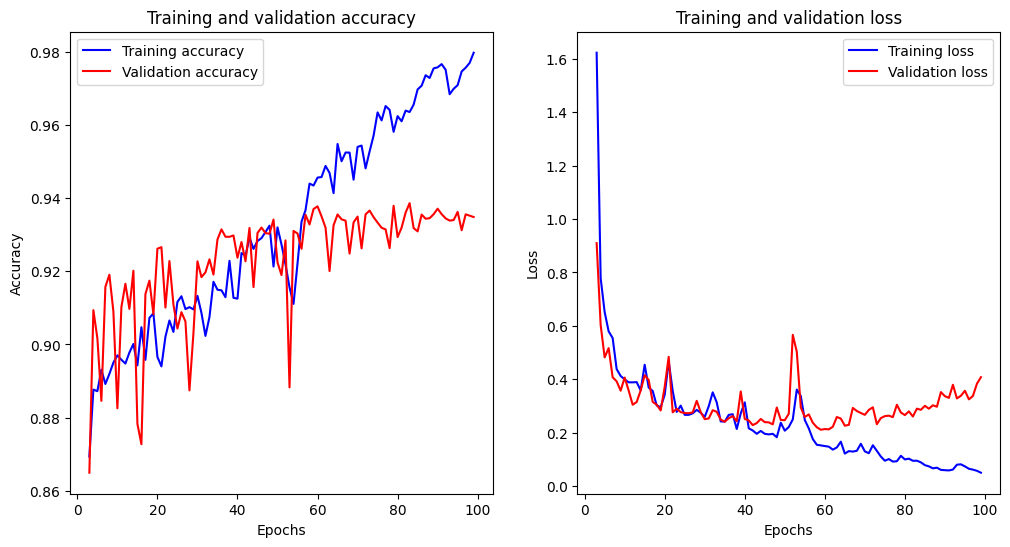

In [ ]:
# 손실 그래프
epochs2 = range(3, len(history2.history["loss"]))
loss2 = history2.history["loss"][3:] # 3까지의 손실 함수가 너무 커서 제외
val_loss2 = history2.history["val_loss"][3:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs2, loss2, "b", label="Training loss")
plt.plot(epochs2, val_loss2, label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc2 = history2.history["accuracy"][3:]
val_acc2 = history2.history["val_accuracy"][3:]

plt.subplot(1, 2, 1)
plt.plot(epochs2, acc2, "b", label="Training accuracy")
plt.plot(epochs2, val_acc2, label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model

test_loss2, test_accuracy2 = model2.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss2)
print("Test Accuracy:", test_accuracy2)

1/1 [==============================] - 10s 10s/step - loss: 0.6378 - accuracy: 0.9052
Test Loss: 0.6378305554389954
Test Accuracy: 0.9052276611328125


In [ ]:
prediction2 = model2.predict(test_input_imgs)

1/1 [==============================] - 1s 589ms/step


In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[0]/255)

plt.subplot(1,3,2)
output2 = np.argmax(prediction2[0], axis=-1)
plt.imshow(output2)

plt.subplot(1,3,3)
plt.imshow(test_targets[0])

In [ ]:
# def calculate_iou(y_true, y_pred):
#     intersection = np.logical_and(y_true, y_pred)
#     union = np.logical_or(y_true, y_pred)
#     iou = np.sum(intersection) / np.sum(union)
#     return iou

def mean_iou(y_true, y_pred):

    # Get total number of classes from model output.
    num_classes = y_pred.shape[-1]

    y_true = tf.squeeze(y_true, axis=-1)

    y_true = tf.one_hot(tf.cast(y_true, tf.int32), num_classes, axis=-1)
    y_pred = tf.one_hot(tf.math.argmax(y_pred, axis=-1), num_classes, axis=-1)

    # Intersection: |G ∩ P|. Shape: (batch_size, num_classes)
    intersection = tf.math.reduce_sum(y_true * y_pred, axis=(1, 2))

    # Total Sum: |G| + |P|. Shape: (batch_size, num_classes)
    total = tf.math.reduce_sum(y_true, axis=(1, 2)) + tf.math.reduce_sum(y_pred, axis=(1, 2))

    union = total - intersection

    is_class_present =  tf.cast(tf.math.not_equal(total, 0), dtype=tf.float32)
    num_classes_present = tf.math.reduce_sum(is_class_present, axis=1)

    iou = tf.math.divide_no_nan(intersection, union)
    iou = tf.math.reduce_sum(iou, axis=1) / num_classes_present

    # Compute the mean across the batch axis. Shape: Scalar
    mean_iou = tf.math.reduce_mean(iou)

    return mean_iou

In [ ]:
# IoU 계산 및 출력
iou_values2 = []

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    output2 = np.argmax(prediction2[i], axis=-1)
    plt.imshow(output2)
    plt.title("Predicted Segmentation")

    plt.subplot(1, 3, 3)
    plt.imshow(test_targets[i])
    plt.title("True Segmentation")

    # IoU 계산 및 출력
    iou2 = calculate_iou(test_targets[i], output2)
    iou_values2.append(iou2)
    print(f"IoU for sample {i + 1}: {iou2}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [ ]:
# 전체 평균 IoU 출력
average_iou2 = np.mean(iou_values2)
print(f"\nAverage IoU across all samples: {average_iou2}")


Average IoU across all samples: 0.036387971609131944


**이것 역시, 클래스 별로 IoU 구하는 새로운 IoU 만들어 보자!**

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# IoU 계산 함수
def calculate_iou(y_true, y_pred, class_index):
    intersection = np.logical_and(y_true == class_index, y_pred == class_index)
    union = np.logical_or(y_true == class_index, y_pred == class_index)
    iou = np.sum(intersection) / np.sum(union)
    return iou

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    # plt.subplot(1, 4, 1)
    # plt.imshow(test_input_imgs[i] / 255)
    # plt.title("Input Image")

    for class_index in range(3):  # 클래스 수에 따라 반복
        plt.subplot(2, 3, class_index + 1)
        output2 = np.argmax(prediction2[i], axis=-1)
        plt.imshow(output2 == class_index)
        plt.title(f"Predicted Class {class_index}")

        plt.subplot(2, 3, class_index + 4)
        plt.imshow(test_targets[i]==class_index)
        plt.title(f"Target Class {class_index}")

    # 시각화를 위한 subplot 초기화
    plt.show()


In [ ]:
def calculate_iou_score(target, prediction):
# 각 픽셀별로 어떤 클래스로 예측하고 있는지를 알아야 함
# (128, 128, 6) -> (128, 128, 1)
    one_c_prediction = np.argmax(prediction, axis=2)
    one_c_target = target[:, :, 0]

    # 이미지의 전체 영역 크기 계산
    total_area = one_c_prediction.shape[0] ** 2

    # 각 클래스에 대한 IoU 및 영역 정보를 저장할 리스트 초기화
    IoUs = []
    areas = []

    for class_i in range(3):
        # 해당 클래스에 속하는 픽셀을 True로 설정
        pred = np.where(one_c_prediction==class_i, True, False)
        target = np.where(one_c_target==class_i, True, False)

        intersection = np.logical_and(target, pred) # 교집합
        union = np.logical_or(target, pred) # 합집합
        iou_score = np.sum(intersection) / np.sum(union)

        IoUs.append(iou_score) # IoU 결과 리스트 추가

        # 해당 클래스가 차지하는 영역 구하기
        area = pred.sum() / total_area
        areas.append(area)

    return IoUs, areas


In [ ]:
IoUs2, areas2 = calculate_iou_score(targets[0], prediction2[0])

In [ ]:
sum(IoUs2) / 3

0.33377237285775513

In [ ]:
sum([iou * area for iou, area in zip(IoUs2, areas2)]) # 영역의 크기로 가중치

0.779642809826751

**segnet**

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, concatenate, Rescaling

def build_model3(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_1 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_2 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_3 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_4 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Decoder
    # Block 4
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_4

    # Block 3
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_3

    # Block 2
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_2

    # Block 1
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_1

    # Output layer
    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model3 = build_model3(img_size=img_size, num_classes=3)
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['batch_normalization[0][0

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model3_segnet.keras", save_best_only=True)

history3 = model3.fit(train_input_imgs, train_targets,
                    epochs=50,
                    callbacks=callbacks,
                    batch_size=8,
                    validation_data=(val_input_imgs, val_targets))


## 학습 결과 평가 - segnet

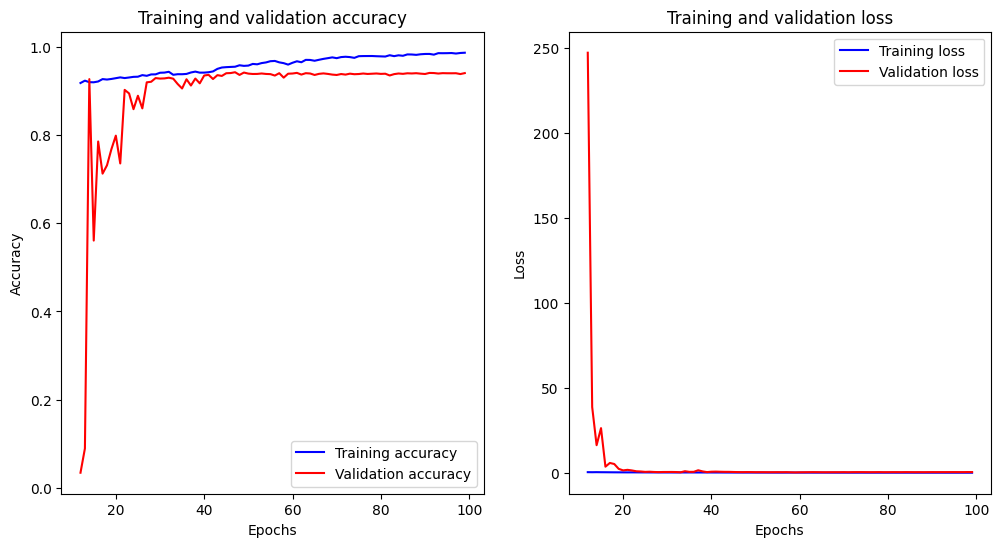

In [ ]:
# 손실 그래프
epochs3 = range(12, len(history3.history["loss"])) # 12의 손실 함수가 너무 커서 그 이후로
loss3 = history3.history["loss"][12:]
val_loss3 = history3.history["val_loss"][12:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs3, loss3, "b", label="Training loss")
plt.plot(epochs3, val_loss3, label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc3 = history3.history["accuracy"][12:]
val_acc3 = history3.history["val_accuracy"][12:]

plt.subplot(1, 2, 1)
plt.plot(epochs3, acc3, "b", label="Training accuracy")
plt.plot(epochs3, val_acc3, label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model

test_loss3, test_accuracy3 = model3.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss3)
print("Test Accuracy:", test_accuracy3)

1/1 [==============================] - 0s 262ms/step - loss: 0.4346 - accuracy: 0.9103
Test Loss: 0.4346231520175934
Test Accuracy: 0.9103378057479858


In [ ]:
prediction3 = model3.predict(test_input_imgs)

1/1 [==============================] - 0s 361ms/step


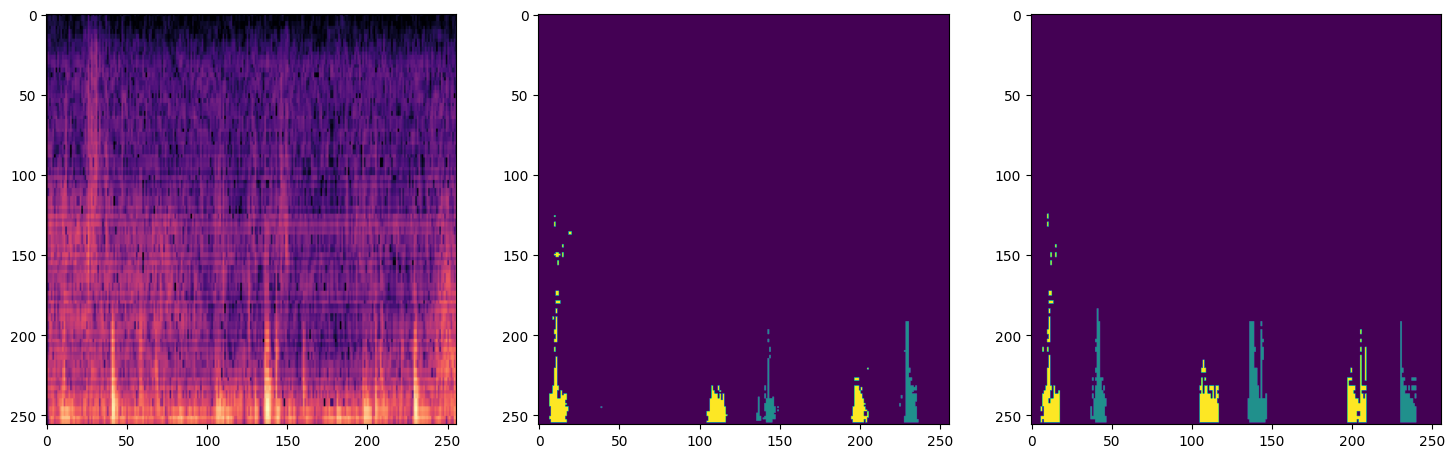

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[5]/255)

plt.subplot(1,3,2)
output3 = np.argmax(prediction3[5], axis=-1)
plt.imshow(output3)

plt.subplot(1,3,3)
plt.imshow(test_targets[5])

In [ ]:
def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)
    return iou

In [ ]:
# IoU 계산 및 출력
iou_values3 = []

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    output3 = np.argmax(prediction3[i], axis=-1)
    plt.imshow(output3)
    plt.title("Predicted Segmentation")

    plt.subplot(1, 3, 3)
    plt.imshow(test_targets[i])
    plt.title("True Segmentation")

    # IoU 계산 및 출력
    iou3 = calculate_iou(test_targets[i], output3)
    iou_values3.append(iou3)
    print(f"IoU for sample {i + 1}: {iou3}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [ ]:
# 전체 평균 IoU 출력
average_iou3 = np.mean(iou_values3)
print(f"\nAverage IoU across all samples: {average_iou3}")


Average IoU across all samples: 0.03853922734032942


**이것 역시, 클래스 별로 IoU 구하는 새로운 IoU 만들어 보자!**

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# IoU 계산 함수
def calculate_iou(y_true, y_pred, class_index):
    intersection = np.logical_and(y_true == class_index, y_pred == class_index)
    union = np.logical_or(y_true == class_index, y_pred == class_index)
    iou = np.sum(intersection) / np.sum(union)
    return iou

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    # plt.subplot(1, 4, 1)
    # plt.imshow(test_input_imgs[i] / 255)
    # plt.title("Input Image")

    for class_index in range(3):  # 클래스 수에 따라 반복
        plt.subplot(2, 3, class_index + 1)
        output3 = np.argmax(prediction3[i], axis=-1)
        plt.imshow(output3 == class_index)
        plt.title(f"Predicted Class {class_index}")

        plt.subplot(2, 3, class_index + 4)
        plt.imshow(test_targets[i]==class_index)
        plt.title(f"Target Class {class_index}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [ ]:
def calculate_iou_score(target, prediction):
# 각 픽셀별로 어떤 클래스로 예측하고 있는지를 알아야 함
# (128, 128, 6) -> (128, 128, 1)
    one_c_prediction = np.argmax(prediction, axis=2)
    one_c_target = target[:, :, 0]

    # 이미지의 전체 영역 크기 계산
    total_area = one_c_prediction.shape[0] ** 2

    # 각 클래스에 대한 IoU 및 영역 정보를 저장할 리스트 초기화
    IoUs = []
    areas = []

    for class_i in range(3):
        # 해당 클래스에 속하는 픽셀을 True로 설정
        pred = np.where(one_c_prediction==class_i, True, False)
        target = np.where(one_c_target==class_i, True, False)

        intersection = np.logical_and(target, pred) # 교집합
        union = np.logical_or(target, pred) # 합집합
        iou_score = np.sum(intersection) / np.sum(union)

        IoUs.append(iou_score) # IoU 결과 리스트 추가

        # 해당 클래스가 차지하는 영역 구하기
        area = pred.sum() / total_area
        areas.append(area)

    return IoUs, areas

In [ ]:
IoUs3, areas3 = calculate_iou_score(targets[0], prediction3[0])

In [ ]:
sum(IoUs3) / 3

0.2909546537767193

In [ ]:
sum([iou * area for iou, area in zip(IoUs3, areas3)]) # 영역의 크기로 가중치

0.7155846453826998

**Deeplab**

In [ ]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# def convolution_block(
#     block_input,
#     num_filters=256,
#     kernel_size=3,
#     dilation_rate=1,
#     padding="same",
#     use_bias=False,
# ):
#     x = layers.Conv2D(
#         num_filters,
#         kernel_size=kernel_size,
#         dilation_rate=dilation_rate,
#         padding="same",
#         use_bias=use_bias,
#         kernel_initializer=keras.initializers.HeNormal(),
#     )(block_input)
#     x = layers.BatchNormalization()(x)
#     return tf.nn.relu(x)


# def DilatedSpatialPyramidPooling(dspp_input):
#     dims = dspp_input.shape
#     x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
#     x = convolution_block(x, kernel_size=1, use_bias=True)
#     out_pool = layers.UpSampling2D(
#         size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
#     )(x)

#     out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
#     out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
#     out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
#     out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

#     x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
#     output = convolution_block(x, kernel_size=1)
#     return output

In [ ]:
# from tensorflow.keras.layers import Input, Rescaling, UpSampling2D, Conv2D, Concatenate
# from tensorflow.keras import Model
# import tensorflow.keras as keras
# import tensorflow as tf

# def DeeplabV3Plus(img_size, num_classes):
#     inputs = Input(shape=img_size)
#     rescaling = Rescaling(1./255)(inputs)

#     resnet50 = keras.applications.ResNet50(
#         weights="imagenet", include_top=False, input_tensor=rescaling
#     )

#     x = resnet50.get_layer("conv4_block6_2_relu").output
#     x = DilatedSpatialPyramidPooling(x)

#     input_a = UpSampling2D(
#         size=(img_size[0] // 4 // int(x.shape[1]), img_size[1] // 4 // int(x.shape[2])),
#         interpolation="bilinear",
#     )(x)

#     input_b = resnet50.get_layer("conv2_block3_2_relu").output
#     input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

#     x = Concatenate(axis=-1)([input_a, input_b])
#     x = convolution_block(x)
#     x = convolution_block(x)
#     x = UpSampling2D(
#         size=(img_size[0] // int(x.shape[1]), img_size[1] // int(x.shape[2])),
#         interpolation="bilinear",
#     )(x)
#     model_output = Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)

#     return Model(inputs=inputs, outputs=model_output)

# img_size = (256, 256, 3)
# num_classes = 3  # Example number of classes
# model4 = DeeplabV3Plus(img_size=img_size, num_classes=num_classes)
# model4.summary()

In [ ]:
# !pip install keras_cv

In [ ]:
import os
import requests
from zipfile import ZipFile
import glob
from dataclasses import dataclass

import random
import numpy as np
import cv2

import tensorflow as tf
import keras_cv

import matplotlib.pyplot as plt

Using TensorFlow backend


In [ ]:
@dataclass(frozen=True)
class DatasetConfig:
    IMAGE_SIZE:        tuple = (256, 256)
    BATCH_SIZE:          int = 16
    NUM_CLASSES:         int = 3
    # BRIGHTNESS_FACTOR: float = 0.2 #여기서는 일단 적용안함
    # CONTRAST_FACTOR:   float = 0.2

In [ ]:
@dataclass(frozen=True)
class TrainingConfig:
    MODEL:           str = "resnet50_v2_imagenet"
    EPOCHS:          int = 100
    LEARNING_RATE: float = 1e-4
    CKPT_DIR:        str = os.path.join("checkpoints_"+"_".join(MODEL.split("_")[:2]),
                                        "deeplabv3_plus_"+"_".join(MODEL.split("_")[:2])+".keras")
    LOGS_DIR:        str = "logs_"+"_".join(MODEL.split("_")[:2])

In [ ]:
data_config = DatasetConfig()
train_config = TrainingConfig()

In [ ]:
backbone = keras_cv.models.ResNet50V2Backbone.from_preset(preset = train_config.MODEL,
                                                          input_shape=data_config.IMAGE_SIZE+(3,),
                                                          load_weights = True)
model4 = keras_cv.models.segmentation.DeepLabV3Plus(
        num_classes=data_config.NUM_CLASSES, backbone=backbone,
    )

100%|██████████| 886/886 [00:00<00:00, 608kB/s]
100%|██████████| 90.3M/90.3M [00:03<00:00, 25.7MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [ ]:
model4.summary()

Model: "deep_lab_v3_plus"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 model_1 (Functional)        {'P2': (None, 64, 64, 256)   2355660   ['input_3[0][0]']             
                             , 'P5': (None, 8, 8, 2048)   8                                       
                             }                                                                    
                                                                                                  
 spatial_pyramid_pooling (S  (None, 8, 8, 256)            1553817   ['model_1[0][1]']             
 patialPyramidPooling)                                    6                        

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model4_Deeplab.keras", save_best_only=True)

history4 = model4.fit(train_input_imgs, train_targets,
                    epochs=100,
                    callbacks=callbacks,
                    batch_size=16,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/100


159/159 [==============================] - ETA: 0s - loss: 0.2123 - accuracy: 0.9263

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


159/159 [==============================] - 263s 1s/step - loss: 0.2123 - accuracy: 0.9263 - val_loss: 0.1814 - val_accuracy: 0.9355
Epoch 2/100
159/159 [==============================] - 144s 906ms/step - loss: 0.1576 - accuracy: 0.9416 - val_loss: 0.1634 - val_accuracy: 0.9425
Epoch 3/100
159/159 [==============================] - 144s 903ms/step - loss: 0.1408 - accuracy: 0.9455 - val_loss: 0.1398 - val_accuracy: 0.9477
Epoch 4/100
159/159 [==============================] - 144s 906ms/step - loss: 0.1312 - accuracy: 0.9483 - val_loss: 0.1361 - val_accuracy: 0.9489
Epoch 5/100
159/159 [==============================] - 146s 918ms/step - loss: 0.1244 - accuracy: 0.9500 - val_loss: 0.1359 - val_accuracy: 0.9494
Epoch 6/100
159/159 [==============================] - 127s 797ms/step - loss: 0.1195 - accuracy: 0.9515 - val_loss: 0.1387 - val_accuracy: 0.9479
Epoch 7/100
159/159 [==============================] - 148s 930ms/step - loss: 0.1133 - accuracy: 0.9532 - val_loss: 0.1286 - val_acc

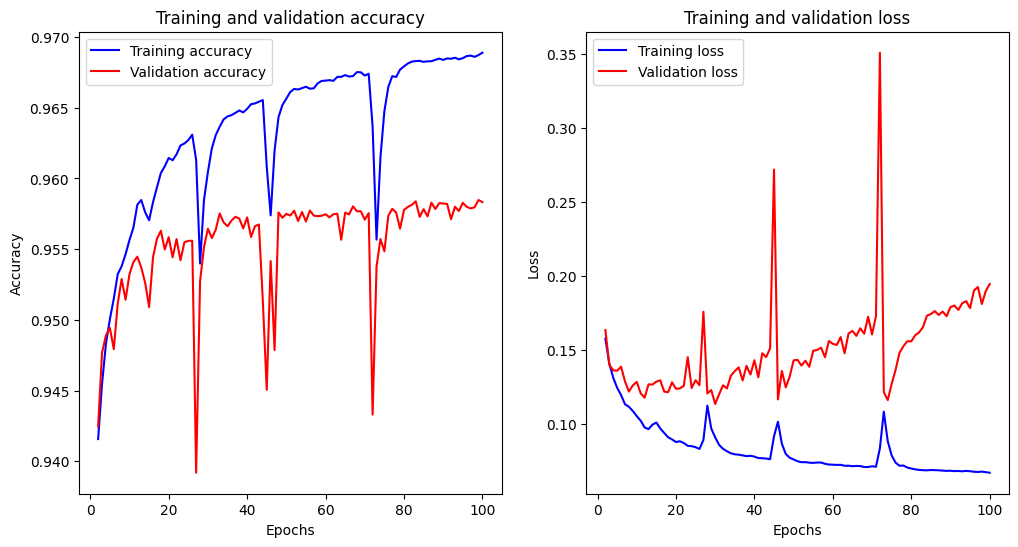

In [ ]:
# 손실 그래프
epochs4 = range(2, len(history4.history["loss"]) + 1)
loss4 = history4.history["loss"][1:] # 1의 손실 함수가 너무 커서 제외
val_loss4 = history4.history["val_loss"][1:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs4, loss4, "b", label="Training loss")
plt.plot(epochs4, val_loss4, label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc4 = history4.history["accuracy"][1:]
val_acc4 = history4.history["val_accuracy"][1:]

plt.subplot(1, 2, 1)
plt.plot(epochs4, acc4, "b", label="Training accuracy")
plt.plot(epochs4, val_acc4, label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# 저장된 모델 불러오기
loaded_model4 = load_model("seg_model4_Deeplab.keras")

test_loss4, test_accuracy4 = loaded_model4.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss4)
print("Test Accuracy:", test_accuracy4)

10/10 [==============================] - 33s 2s/step - loss: 0.1207 - accuracy: 0.9538
Test Loss: 0.12074457854032516
Test Accuracy: 0.9538490176200867


In [ ]:
prediction4 = loaded_model4.predict(test_input_imgs)

10/10 [==============================] - 5s 421ms/step


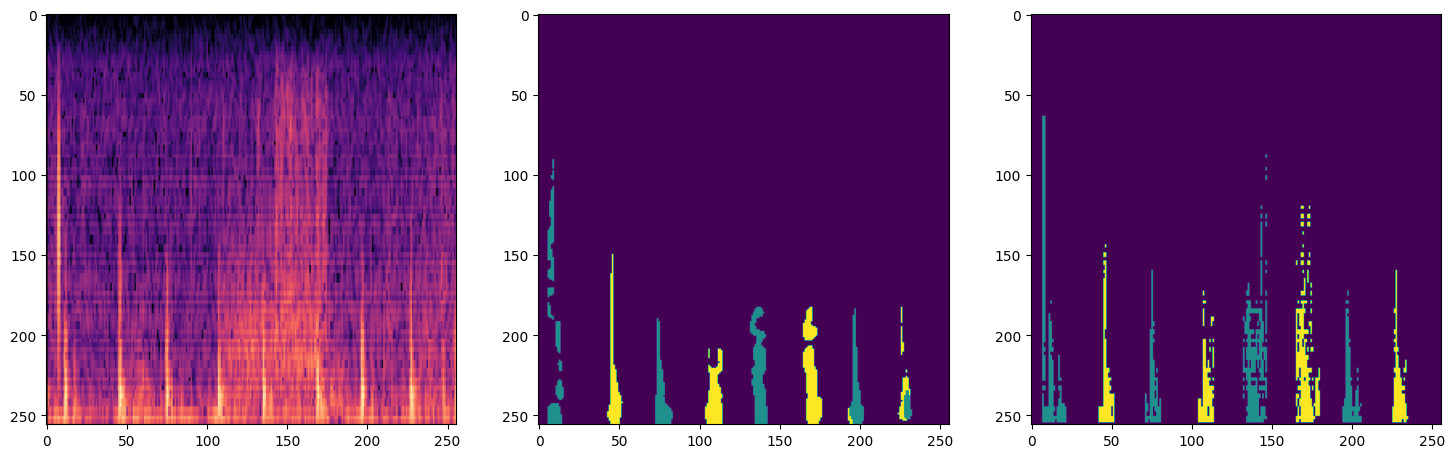

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[3]/255)

plt.subplot(1,3,2)
output4 = np.argmax(prediction4[3], axis=-1)
plt.imshow(output4)

plt.subplot(1,3,3)
plt.imshow(test_targets[3])

In [ ]:
def mean_iou(y_true, y_pred):

    # Get total number of classes from model output.
    # num_classes = y_pred.shape[-1]

    # y_true = tf.squeeze(y_true, axis=-1)

    # y_true = tf.one_hot(tf.cast(y_true, tf.int32), num_classes, axis=-1)
    # y_pred = tf.one_hot(tf.math.argmax(y_pred, axis=-1), num_classes, axis=-1)

    # Intersection: |G ∩ P|. Shape: (batch_size, num_classes)
    intersection = tf.math.reduce_sum(y_true * y_pred, axis=(1, 2))

    # Total Sum: |G| + |P|. Shape: (batch_size, num_classes)
    total = tf.math.reduce_sum(y_true, axis=(1, 2)) + tf.math.reduce_sum(y_pred, axis=(1, 2))

    union = total - intersection

    is_class_present =  tf.cast(tf.math.not_equal(total, 0), dtype=tf.float32)
    num_classes_present = tf.math.reduce_sum(is_class_present, axis=1)

    iou = tf.math.divide_no_nan(intersection, union)
    iou = tf.math.reduce_sum(iou, axis=1) / num_classes_present

    # Compute the mean across the batch axis. Shape: Scalar
    mean_iou = tf.math.reduce_mean(iou)

    return mean_iou

# def calculate_iou(y_true, y_pred):
#     intersection = np.logical_and(y_true, y_pred)
#     union = np.logical_or(y_true, y_pred)
#     iou = np.sum(intersection) / np.sum(union)
#     return iou

In [ ]:
# IoU 계산 및 출력
iou_mean_4 = []

# test_input_imgs에서 무작위로 10개의 인덱스를 선택
random_indices = random.sample(range(len(test_input_imgs)), 10)

for i in random_indices:
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    output4 = np.argmax(prediction4[i], axis=-1)
    plt.imshow(output4)
    plt.title("Predicted Segmentation")

    plt.subplot(1, 3, 3)
    plt.imshow(test_targets[i])
    plt.title("True Segmentation")

    # IoU 계산 및 출력
    iou4 = mean_iou(test_targets[i], output4)
    iou_mean_4.append(iou4)
    print('------------------------------------')
    print(f"IoU for sample {i + 1}: {iou4}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [ ]:
전체 평균 IoU 출력
average_iou4 = np.mean(iou_values4)
print(f"\nAverage IoU across all samples: {average_iou4}")


Average IoU across all samples: 0.035633276729925605


**이것 역시, 클래스 별로 IoU 구하는 새로운 IoU 만들어 보자!**

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# IoU 계산 함수
def calculate_iou(y_true, y_pred, class_index):
    intersection = np.logical_and(y_true == class_index, y_pred == class_index)
    union = np.logical_or(y_true == class_index, y_pred == class_index)
    iou = np.sum(intersection) / np.sum(union)
    return iou

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    for class_index in range(3):  # 클래스 수에 따라 반복
        plt.subplot(2, 3, class_index + 1)
        output4 = np.argmax(prediction4[i], axis=-1)
        plt.imshow(output4 == class_index)
        plt.title(f"Predicted Class {class_index}")

        plt.subplot(2, 3, class_index + 4)
        plt.imshow(test_targets[i]==class_index)
        plt.title(f"Target Class {class_index}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [ ]:
def calculate_iou_score(target, prediction):
# 각 픽셀별로 어떤 클래스로 예측하고 있는지를 알아야 함
# (128, 128, 6) -> (128, 128, 1)
    one_c_prediction = np.argmax(prediction, axis=2)
    one_c_target = target[:, :, 0]

    # 이미지의 전체 영역 크기 계산
    total_area = one_c_prediction.shape[0] ** 2

    # 각 클래스에 대한 IoU 및 영역 정보를 저장할 리스트 초기화
    IoUs = []
    areas = []

    for class_i in range(3):
        # 해당 클래스에 속하는 픽셀을 True로 설정
        pred = np.where(one_c_prediction==class_i, True, False)
        target = np.where(one_c_target==class_i, True, False)

        intersection = np.logical_and(target, pred) # 교집합
        union = np.logical_or(target, pred) # 합집합
        iou_score = np.sum(intersection) / np.sum(union)

        IoUs.append(iou_score) # IoU 결과 리스트 추가

        # 해당 클래스가 차지하는 영역 구하기
        area = pred.sum() / total_area
        areas.append(area)

    return IoUs, areas

In [ ]:
IoUs4, areas4 = calculate_iou_score(targets_test[0], prediction4[0])

In [ ]:
sum(IoUs4) / 3

0.7639937733517715

In [ ]:
sum([iou * area for iou, area in zip(IoUs4, areas4)]) # 영역의 크기로 가중치

0.9753810738879858

In [ ]:
# import pandas as pd

# results_df = pd.DataFrame({
#     'Model': ['Unet','Unet++','Segnet','Deeplab'],
#     'Accuracy': [test_accuracy, test_accuracy2, test_accuracy3, test_accuracy4],
#     'Loss': [test_loss, test_loss2, test_loss3, test_loss4],
#     'Average IoU': [average_iou,average_iou2,average_iou3, average_iou4],
#     'New IoU' : [sum([iou * area for iou, area in zip(IoUs, areas)]),
#                  sum([iou * area for iou, area in zip(IoUs2, areas2)]),
#                  sum([iou * area for iou, area in zip(IoUs3, areas3)]),
#                  sum([iou * area for iou, area in zip(IoUs4, areas4)])]
# })

# # 표 출력
# print(results_df)

In [ ]:
# for i in range(len(test_input_imgs)):
#     # 시각화를 위한 subplot 설정
#     plt.figure(figsize=(15, 5))

#     plt.subplot(1, 6, 1)
#     plt.imshow(test_input_imgs[i] / 255)
#     plt.title("Input Image")

#     plt.subplot(1, 6, 2)
#     output = np.argmax(prediction[i], axis=-1)
#     plt.imshow(output)
#     plt.title("Unet")

#     plt.subplot(1, 6, 3)
#     output2 = np.argmax(prediction2[i], axis=-1)
#     plt.imshow(output2)
#     plt.title("Unet++")

#     plt.subplot(1, 6, 4)
#     output3 = np.argmax(prediction3[i], axis=-1)
#     plt.imshow(output3)
#     plt.title("Segnet")

#     plt.subplot(1, 6, 5)
#     output4 = np.argmax(prediction4[i], axis=-1)
#     plt.imshow(output4)
#     plt.title("Deeplab")

#     plt.subplot(1, 6, 6)
#     plt.imshow(test_targets[i])
#     plt.title("True Segmentation")

#     # 시각화를 위한 subplot 초기화
#     plt.show()